In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder # untuk ordinal dan binary encoder

# resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

# Voting and Stacking
from sklearn.ensemble import VotingClassifier, StackingClassifier

# metric
from sklearn.metrics import mean_squared_error 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# evaluation
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [ ]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 487.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.5 MB 2.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 2.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.5 MB 2.7 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 3.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.5 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


*Company: PT. KingStone*

**Content List:**

A. Overview: 'Project: Triumph':
- Company Overview
- Problem Statement 
- Vision & Mission
- Characteristics in the Travel Insurance Dataset
- Limitations and Benefits from 'Project Triumph'

B. Technical Explanation in Machine Learning: 
- Purpose & Target Variable
- Model yang di gunakan
- Confusion Matrix
- Implications of Confusion Matrix

C. Structure of Machine Learning (Project Triumph): 
- Investigating & Cleaning Dataset
- Handling Outliers
- EDA
- Encoding
- Modeling
- Conclusion


# Overview: Project Triumph

## **Company Overview**

PT. Kingstone merupakkan Travel Agency start-up yang berdomisili di Indonesia, di mana perusahaan ini berinisiatif untuk terjun sektor travel insurance. Dengan demikian project ini bernama 'Project Triumph', di mana kata 'Triumph' translate ke kata kemenangan di mana ini merepresentasikan tujuan end goal yang ingin di capai oleh PT. Kingstone. 

Berikut penjelasaan lebih lanjut mengenai product dari business travel agency kami dan scope dari market kami:  

**`The Product/Business`**: Secara umum tipe produk pada asuransi travel adalah Travel Insurance, Travel Medical Insurance, dan International Health Insurance. PT. Kingstone akan fokus kepada segmen produk Travel Insurance, di mana asuransi ini berfokus kepada melindungi pelanggan terhadap perencanaan travel mereka yang telah di booking 'in advance'. Banyak hal yang akan terjadi dalam waktu setahun, 6 bulan, atau pun  1 bulan kedepan planning yang telah di rencanakan oleh traveler dan kami ingin memproteksi pelanggan terhadap situasi ketidak wajaran yang akan terjadi dari aspek, akomodasi, tiket transportasi, dan unrefundable trip cost lainnya. Untuk catatan tambahan travel asuransi ini berlaku dalam domestik dan international travel.   


**`Market Overview (Travel Insurance)`**: Dari aspek perkembangan industri asuransi travel, industri tersebut di prediksi memiliki perkembangan CAGR sebesar 15.35% menurut 'ResearchAndMarket.com'. CAGR atau Compound Annual Growth Rate merupakan metrik yang sering di gunakan untuk mengukur pertumbuhan industri asuransi dari waktu ke waktu. Dari gambar di bawah telah di prediksi pertumbuhan market size dari tahun 2025 - 2030 akan mengalami pertumbuhan sebesar USD 59.341 billion (IDR 969.94 Triliun). Secara umum segmentasi geografis destinasi travel terdiri atas North America, South America, Europe, Middle East, Africa, dan Asia-Pacific. Negara seperti Cina, Jepang, India, dan Korea Selatan mendominasi segmen Asia-Pacific dan pada tahun 2022 India menjadi market terbesar untuk destinasi travel. Negara-negara ASEAN yang termasuk dalam Asia-Pacific mengalami perkembangan ekonomi yang pesat yang patut di pantau sebagai destinasi travel. Dari grafik di bawah juga merepresentasikan perkembangan yang pesat dalam dunia travel sejak COVID-19 Outbreak pada tahun 2020.    

![My Plot](travel-insurance-market.png)


**`Potential StakeHolders`**:

![My Diagram](StakeHold.png)


- PRIMARY STAKEHOLDERS: Stakeholders dalam kategori ini merupakan kontributor utama dalam business di mana investors, employees membantu dari segi operasional dan capital. Insurance providers sangat berperan bagaimana PT. Kingstone mengatur premium plan ataupun plan asuransi yang lainnya, dan kedua pihak memiliki power untuk mempengaruhi aspek tersebut. Sama seperti insurance provider, kedua dari travel agency dan agency asuransi memiliki mutual benefit di mana dengan menawarkan asuransi travel kepada mereka, dapat memitigasi potensi liabilitas saat pelanggan melakukan perjalanannya. Dan tentu saja customers sangat mempengaruhi kesusksesan atau kegagalan PT. Kingstone karena buying power dan feedback, bisa mengubah atau mempengaruhi agency dari spektrum yang luas. 

- SECONDARY STAKEHOLDERS: Stakeholders dalam kategori ini secara langsung tidak mempengaruhi PT. Kingstone, tetapi bisa mempengaruhi atau terpengaruhi oleh perusahaan tergantung dengan langkah yang di tempuh dari salah satu pihak. Pemerintah local atau pun organisasi parawisata lokal, keduanya tidak memiliki implikasi secara langsung dengan perusahaan tetapi regulasi travel bisa mempengaruhi operasi PT. Kingstone. Broker untuk asuransi memiliki peran yang unik karena mereka tidak secara langsung berkontribusi kepada perusahaan/agency tetapi mereka mempromosikan atau menawarkan plan asuransi kepada pelanggan, oleh karena itu PT. Kingstone berada di repertoire/radar broker asuransi sanagatlah penting. Komunitas negara destinasi travel pelanggan tidak ada efek secara langsung tetapi sangatlah penting di mana seperti contoh di mana tingkat keamanan komunitas tersebut bisa mempengaruhi di mana pelanggan akan meng-klaim asuransi atau tidak. 

- TERTIARY STAKEHOLDERS: Stakeholders dalam kategori ini tidak memiliki dampak yang signifikan terhadap insurance travel agency, tetapi tidak signifikan bukan berarti tidak berpengaruh sama sekali. Long term efek atau pun future trend bisa mempengaruhi agency yang terkait. Di mana airline industry, sosial media, future generations, general public, ataupun penemuan research baru bagi para akademis memiliki efek 'overtime' dan juga mengetahui perkembangan teknologi bersifat maju yang berkelanjutan. 

Source(s): (https://www.globenewswire.com/news-release/2025/01/10/3007466/28124/en/Travel-Insurance-Market-Forecasts-2025-2030-Growth-Opportunities-Challenges-Supply-Chain-Outlook-Regulatory-Framework-Customer-Behaviour-and-Trend-Analysis.html) | (https://www.grandviewresearch.com/industry-analysis/travel-insurance-market-report) | (https://www.infodiagram.com/slides/primary-secondary-tertiary-stakeholders-distribution-/)

## **Problem Statement with Vision & Mission**

**`Problem Statement`**: 'Attribute dari claimed insurance merupakan faktor terpenting dalam menjalani bisnis asuransi travel, memperjelas attribute tersebut merupakan salah satu fokus terpenting dalam Machine Learning. Dan disertai dengan pertanyaan seberapa akurat model Machine Learning ini dapat memprediksi unclaimed insurance dari pelanggan?'

 
**`Vision`**
- Menjadi Travel Insurance Agency unggul di antara agency international yang lain. 
- Menyediakan asuransi travel di negara-negara travel yang unggul.
- Menjadi travel agency yang terpercaya di antara perusahaan asuransi unggul dan ternama.
- Mempunyai Ai based technology yang terbaru dengan bekerja samanya kepada technology provider yang ternama dan terpercaya dalam aspek consumer data protection.  

**`Mission`**
- Mengolah Machine Learning yang akurat dan mengupdate prediksi un-claimed insurance dari tahun ke tahun menggunakan dataset terbaru. 
- Mengelola premium insurance plan yang terjangkau dan profitable. 
- Memiliki standar asuransi plan yang transparan dan accountable. 
- Secara konsisten membentuk perjanjian komisi yang adil terhadap perusahaan asuransi

## **Characteristics in the Travel Insurance Dataset**

`Agency` = Nama travel agency (Berdasarkan kode agency)

`Agency Type` = Tipe Asuransi Travel Agency

`Distribution Channel` = Tipe service dari asuransi travel yang di pilih pelanggan (Online/Offline)

`Product Name` = Plan asuransi yang di pilih pelanggan 

`Gender` = Jenis kelamin dari pelanggan asuransi travel

`Duration` = Durasi travel dari pelanggan (Satuan Hari)

`Destination` = Destinasi travel pelanggan

`Net Sales` = Harga sales dari pembelian insurance policy oleh pelanggan

`Commision (in Value)` = Komisi yang di terima agency asuransi travel dari penjualan insurance policy dari perusahaan asuransi

`Age` = Umur dari pelanggan asuransi travel

`Claim` = Status claim asuransi travel

## **Limitation and Benefits from 'Project Triumph'**

**`Benefits:`**
- Terget variable yang mudah di mengerti.
- Kesingkatan interpretasi dari Machine Learning yang kompleks.
- Fondasi dataset yang kuat dikarenakan memiliki aspek attribute kategorikal dna numerical. 


**`Limitations:`**
- Tidak adanya penjelasan kekinian dari dataset tersebut (Tahun observasi dataset)
- Attribute agency memiliki keunikan data yang sangat besar dan susah di interpretasi dikarenakan di gambarkan berdasarkan kode agency, sehingga susah di investigasi secara manual. 
- Dataset tidak memiliki aspek yang rinci diluar aspek kategorikal dan numerikal, seperti nilai review dari tingkat kepuasan pelanggan terhadap travel agency tersebut.
- Semakin lama project berlanjut, semakin costly akan berdampak kepada perusahaan. 

# Technical Explanation in Machine Learning

## **Purpose & Target Variable**

Tujuan Machine Learing: 
- Berhubung dengan problem statement yang di tetapkan di awal, claimed atau un-claimed insurance merupakan indicator nyata bagi industri asuransi dan dapat menentukan sustainability dari aspek bisnis. Di mana tujuan machine learning adalah untuk memprediksi pola dari data tersebut, memprediksi 'unclaimed insurance' dan mengoptimalisasi model tersebut sehingga prediksi dapat terlaksanakan seakurat mungkin. 

Target Variable: 
* Yes: Nasabah mengajukan klaim (positif klaim).
* No: Nasabah tidak mengajukan klaim (negatif klaim).

Proporsi feature 'Claim' : 

In [3]:
df['Claim'].value_counts() / len(df)

Claim
No     0.984727
Yes    0.015273
Name: count, dtype: float64

- Terlihat bahwa fitur status claim asuransi travel memiliki proporsi besar yang sangat berpihak kepada pilihan 'No'(not claim) dengan persentase kurang lebih sebesar 98%. Oleh karena itu di perlukan penanganan menggunakan teknik undersampling atau oversampling.  

## **Possible Machine Learning Models**

Berdasarkan sifat dari Target Variable berupa 'categorical predictions', Classification Models adalah segmen dari machine learning models yang akan digunakan sebagai berikut: 

1. Linear Models:
- Logistic Regression

2. Tree-Based Models:
- Decision Trees
- Random Forest

3. K-Nearest Neighbours (KNN)

4. Ensemble Models:
- Bagging
- Boosting
- Stacking 

## **Confusion Matrix**

Untuk interpertasi hasil dari prediksi yang telah di rangkum oleh model, project ini akan menggunakan Confusion Matrix untuk mengevaluasi secara visual ataupun mudah/easy to understand.  

![Matrix](confmx.png)

Source: (https://plat.ai/blog/confusion-matrix-in-machine-learning/)

**`False Positive:`** Kita prediksi pelanggan klaim, namun kenyataanya tidak klaim

**`False Negative:`** Kita prediksi pelanggan tidak klaim, namun kenyataanya klaim

**`True Positive:`** Kita prediksi pelanggan klaim, namun kenyataanya memang klaim

**`True Negative:`** Kita prediksi pelanggan tidak klaim, namun kenyataanya memang tidak klaim

## **Implications of Confusion Matrix**

Basis dari confusion matrix adalah membandingkan actual values dan predicted values untuk menghasilkan sebuah prediksi, yang disertai dengan keakurasian dari prediksi tersebut. Dalam konteks travel insurance, actual values merupakan **`outcome nyata yang telah terjadi di mana pelanggan mengklaim asuransi atau tidak(berdasarkan dataset)`** dan predicted values adalah **`outcome yang di hasilkan oleh model machine learning berdasarkan data yang telah di trained dan tuning(jika diperlukan).`**Berikut adalah implikasi dari Matrix tersebut dalam context travel insurance: 

True Positive (TP) & True Negative (TN): 
- Secara umum kedua outcome ini merupakan basis dari efektifitas model machine learning, walaupun hasil yang ingin di prediksi merupakan pelanggan telah claim atau tidak claim asuransi travel, kedua kejadian tersebut merepresentasikan kebenaran model dalam memprediksi kedua instansi tersebut.

False Positive (FP): 
- Dalam scenario ini model telah memprediksi bahwa pelanggan akan melakukan claim, perusahaan sudah melakukan persiapan dan dana yang diperlukan untuk pelanggan tetapi kenyataannya pelanggan tidak melakukan claim. 
- False Positive dapat merugikan perusahaan dalam beberapa aspek, secara financial akan mengakibatkan 'loss in profit' dikarenakan perusahaan telah mengeluarkan effort dan dana kepada pelanggan yang tidak memerlukannya. Walaupun dari segi pelanggan tidak akan menimbulkan daya positif ataupun negatif, maka False Positive jauh lebih mempengaruhi aspek internal dari insurance agency itu sendiri.  
- Secara marketing akan menibulkan market bayangan di mana upaya promosi dan marketing tidak berada pada ruang lingkup yang tangible atau real. Dengan label 'claim' yang di kaitkan kepada nasabah tersebut, menimbulakan istilah 'false target audience' di mana bisa menimbulkan upaya financial yang tidak membuahkan hasil apabila insurance agency akan menawarkan premium insurance plan kepada pelanggan yang terkait. 

False Negative (FN): 
- Dalam scenario ini telah di prediksi bahwa pelanggan tidak akan melakukan claim, tetapi secara real pelanggan tersebut sangat memrlukan claim tersebut. 
- False Negative sangat lah vital dari aspek bisnis dan pelanggan, tidak hanya akan adanya potensi kehilangan keuntungan dari pelanggan tersebut tetapi adanya juga potensi untuk kehilangan sebagian dari market share dari insurance agency yang terkait. Hal ini disebabkan oleh kemungkinannya 'customer satisfactory' level yang akan turun yang disebabkan oleh label bayang berupa 'False Negative', dan apabila akan berlanjut dapat berdampak negatif dari segala aspek bisnis seperti, financial, marketing, consumer behaviour, dll. 
- Dalam cakupan yang lebih luas, False Negative juga dapat berdampak negatif kepada future planning dan keberlanjutan insurance agency yang terkait. Apabila False Negative ini tidak tertangani atau terkontrol, akan menggangu financial planning dari insurance agency tersebut dan kemungkinan berdampak di mana agency akan melakukan penolakan claim bernominal kecil kepada beberapa pelanggan. Dengan penanganan seperti, balik lagi akan menimbulkan persepsi negatif terhadap agency tersebut dari perspektif pelanggan ataupun pelanggan potensial. 

**Precision & Recall**

Precision dan Recall merupakan metode penanggulangan untuk meminimalisir terjadinya False Positive dan False Negative. Kedua metode ini menggunakan True Positive di mana precision merepresentasikan positive prediction, sedangkan recall merepresentasikan actual positive. Berikut penjelasan lebih lanjut: 

![Matrix_PreRec](confusion_matrix_evaluation_metrics.png)

**`Precision:`**
- Secara umum precision mengukur kebenaran dari prediksi positif dengan tujuan meminimalisir hasil False Positive. 
- Berfokus kepada precision akan meyebabkan sifat selectif di mana akan lebih akurat dalam mendeteksi true positive, akan tetapi lebih sering terjadinya false negative atau representasi yang keliru. 

**`Recall:`**
- Secara umum recall mengukur keakuratan model dalam memprediksi positif yang sesungguhnya dengan tujuan meminimalisir False Negative. 
- Berfokus kepada recall dapat menyebabkan quantitas dari true positive bertambah tetapi mengorbankan akurasi dari model di mana banyak juga akan terjadinya False Positive. 

# Structure of Machine Learning (Project Triumph)

## **Investigating & Cleaning Dataset**

In [4]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


### **Investigating Null Values**

In [6]:
null_count = df.isnull().sum()
print(null_count)

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64


- Dari keseluruhan dataset, terdapat null values dalam feature 'Gender'. Berdasarkan count null syntax, 31627 observasi missing dalam feature 'Gender'. Setelah ini akan dilakukannya investigasi unique values apa saja yang Null dari berbagai macam feature dalam dataset.  

In [8]:
# Numerical Features
num_features = df.describe().columns.to_list()
num_features

df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


**`Feature: Distribution Channel, Claim, Agency`**

In [9]:
missing_gender = df[df['Gender'].isna()]

result = pd.concat([
    missing_gender['Distribution Channel'].value_counts(),
    missing_gender['Claim'].value_counts(),
    missing_gender['Agency Type'].value_counts()
], axis=1)

print(result)


                 count    count    count
Online         31579.0      NaN      NaN
Offline           68.0      NaN      NaN
No                 NaN  31445.0      NaN
Yes                NaN    202.0      NaN
Travel Agency      NaN      NaN  30671.0
Airlines           NaN      NaN    976.0


**`Feature: Agency`**

In [10]:
df['Agency'].unique()

array(['C2B', 'EPX', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'SSI', 'RAB',
       'KML', 'TST', 'TTW', 'JWT', 'ADM', 'CCR', 'CBH'], dtype=object)

In [11]:
df[df['Gender'].isna()]['Agency'].value_counts()

Agency
EPX    24656
CWT     5977
SSI      765
RAB      149
JZI       47
ADM       35
JWT       12
ART        3
TST        2
CCR        1
Name: count, dtype: int64

**`Feature: Product Name`**

In [12]:
df['Product Name'].unique()

array(['Annual Silver Plan', 'Cancellation Plan', 'Basic Plan',
       '2 way Comprehensive Plan', 'Bronze Plan',
       '1 way Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Single Trip Travel Protect Gold', 'Silver Plan', 'Value Plan',
       '24 Protect', 'Annual Travel Protect Gold', 'Comprehensive Plan',
       'Ticket Protector', 'Travel Cruise Protect',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan', 'Gold Plan', 'Annual Gold Plan',
       'Child Comprehensive Plan', 'Premier Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Platinum',
       'Spouse or Parents Comprehensive Plan',
       'Travel Cruise Protect Family'], dtype=object)

**Product Name Explanation:** 

- Basic Plan : Menyediakan cover standar seperti pembatalan perjalanan, perjalanan tertunda, cover bagasi, dan pengeluaran kesehatan.  

- Bronze Plan : Mirip seperti basic plan, plan ini menyediakan kebijakan asuransi yang ekonomis.  
- Annual Silver Plan, Annual Travel Protect Silver, & Silver Plan : Menyediakan cover untuk kecelakaan, sakit, bencana alam, bagasi, pembatalan & gangguan perjalanan dalam aspek 'budget friendly'
- Single Trip Travel Protect Silver : Mirip dengan coverage silver lainnya, tetapi dengan hak istimewa trip satu arah. 
- Annual Travel Protect Gold, Gold Plan, & Annual Gold Plan : Menyediakan cover yang terdapat dalam silver plan tetapi memiliki coverage limit lebih tinggi. 
- Single Trip Travel Protect Gold : Mirip dengan coverage gold lainnya, tetapi dengan hak istimewa trip satu arah. 
- Cancellation Plan : Mengganti biaya prabayar pelanggan yang tidak dapat dikembalikan jika harus membatalkan perjalanan karena alasan pribadi. 
- 2 way Comprehensive Plan : Mengcover keseluruhan dari perjalanan(pulang balik) pelanggan termasuk destinasi yang 'High-Risk'. 
- 1 way Comprehensive Plan : Mengcover keseluruhan perjalanan satu arah tanpa harus berkomitmen dengan tiket pulang. 
- Rental Vehicle Excess Insurance : Mengcover pembiayaan lebih dalam penyewaan kendaraan apabila kendaraan tersebut rusak ataupun dicuri. 
- Value Plan : Tipe asuransi yang ingin menyeimbangkan dari segi harga dan value coverage yang berkecukupan, dan memiliki limit pertanggungan asuransi lebih rendah di bandingkan plan yang lebih komprehensif lainnya.    
- 24 Protect : Protection plan asuransi yang adanya fitur 24 jam bantuan darurat. 
- Comprehensive Plan : Memiliki cakupan tipe yang luas dan cakupan sangat ideal untuk perjalanan bisnis maupun pribadi.  
- Ticket Protector : Memiliki coverage lengkap di seputar penerbangan seperti pembatalan trip, beban perubahan tiket pesawat, penerbangan lanjutan yang terlewatkan, dan delay dalam perjalanan.  
- Travel Cruise Protect : Plan ini merupakan perlindungan perjalanan kapal pesiar dengan berupa banyak benefit di mulai dari antisipasi beban pembatalan perjalanan, kehilangan bagasi, medical care dalam perjalanan, dan interupsi lainnya seputar perjalanan.    
- Travel Cruise Protect Family : Sama seperti travel cruise protect, perbedaan terdapat pada keterlibatannya dalam skala keluarga dan sangat cocok apabila melakukan perjalanan dengan anak kecil ataupun orang tua.  
- Individual Comprehensive Plan : Mirip dengan comprehensive plan, hanya limit pertanggungan asuransi lebih rendah di bandingkan kompihensif plan dalam cakupan wisatawan yang melebihi 1 orang. 
- Child Comprehensive Plan : Mirip dengan comprehensive plan lainnya, hanya berfokus kepada anak di bawah umur. 
- Premier Plan : Asuransi travel yang memiliki nilai limit melebihi kebanyakan jenis travel lainnya yang bermanfaat untuk wisatawan yang sering bepergian, wisata mewah/nyaman, dan perjalanan yang tak terduga. 
- Annual Travel Protect Platinum : Merupakan tingkatan policy tertinggi dari kebanyakan perusahaan asuransi, menawarkan batas penanggungan secara maksimal untuk biaya kecelakaan darurat, pengobatan, evakuasi darurat, dan pemulangan client. 
- Single Trip Travel Protection Platinum : Sama seperti tingkatan platinum lainnya, tetapi hanya berdurasi dalam waktu satu kali perjalanan. 
- Spouse or Parents Comprehensive Plan : Asuransi travel di mana selain dari individu yang terkait, policy asuransi ini juga mencakup pasangan dan keluarga lainnya. 



Sources: (https://www.axatravelinsurance.com/our-plans) | (https://www.allianztravelinsurance.com/find-a-plan/benefits/trip-cancellation.htm) | (https://www.travelguard.com/travel-insurance/plans/essential) | (https://www.insuremytrip.com/travel-insurance-plans/comprehensive/) | (https://www.gocompare.com/travel-insurance/guide/one-way/) | (https://www.allianz.com.au/travel-insurance/rental-car-excess.html) | (https://www.axatravelinsurance.com/our-plans/silver) | (https://www.axatravelinsurance.com/our-plans/gold) | (https://www.insuremytrip.com/travel-insurance-providers/john-hancock/bronze/) | (https://www.generalitravelinsurance.com/travel-resources/travel-protection.html#:~:text=What%20is%20a%20travel%20protection%20plan?%20Travel,to%20a%2024/7%20Emergency%20Assistance%20phone%20line.) (https://www.insuremytrip.com/travel-insurance-plans/comprehensive/) | (https://www.cruisebay.com/special-offers/cruise-travel-insurance) | (https://www.forbes.com/sites/paulaconway/2023/11/28/premier-plan-travel-insurance-the-underrated-holiday-gift/) | (https://www.axatravelinsurance.com/our-plans/platinum) | (https://www.reliancegeneral.co.in/insurance/knowledge-center/insurance-reads/family-travel-insurance.aspx#:~:text=With%20this%20insurance%20type%2C%20you%20can%20travel,pressure%20of%20extensive%20out%2Dof%2Dpocket%20expenses%20when%20abroad.&text=Family%20travel%20insurance%20ensures%20complete%20financial%20protection,activities%2C%20as%20well%20as%20unexpected%20trip%20mishaps.)

In [13]:
df[df['Gender'].isna()]['Product Name'].value_counts()

Product Name
Cancellation Plan                  12979
2 way Comprehensive Plan            9341
Rental Vehicle Excess Insurance     5977
1 way Comprehensive Plan            2336
Ticket Protector                     765
Value Plan                           187
Basic Plan                            40
Premier Plan                          17
24 Protect                             2
Travel Cruise Protect                  2
Comprehensive Plan                     1
Name: count, dtype: int64

lakukan simple division

**`Feature: Duration`**

In [14]:
df[df['Gender'].isna()]['Duration'].value_counts().head(10)

Duration
6     1021
7      978
4      949
5      948
8      947
3      878
2      862
9      820
11     807
10     796
Name: count, dtype: int64

**`Feature: Destination`**

In [15]:
df[df['Gender'].isna()]['Destination'].value_counts().head(10)

Destination
SINGAPORE        3439
MALAYSIA         3396
THAILAND         3074
CHINA            2503
AUSTRALIA        2411
INDONESIA        1789
UNITED STATES    1550
PHILIPPINES      1359
HONG KONG        1273
JAPAN            1262
Name: count, dtype: int64

**`Feature: Net Sales`**

In [16]:
df[df['Gender'].isna()]['Net Sales'].value_counts()

Net Sales
 20.00     4070
 10.00     3315
 0.00      1066
 29.70      923
 80.00      873
           ... 
-17.00        1
 5.25         1
-48.00        1
-297.00       1
 16.54        1
Name: count, Length: 492, dtype: int64

**`Feature: Commision(in value)`**

In [17]:
df[df['Gender'].isna()]['Commision (in value)'].value_counts()

Commision (in value)
0.00     24656
17.82     1096
23.76      895
11.88      678
29.70      664
         ...  
1.27         1
4.67         1
3.62         1
1.57         1
4.64         1
Name: count, Length: 278, dtype: int64

**`Feature: Age`**

In [18]:
df[df['Gender'].isna()]['Age'].value_counts()

Age
36    16617
31     1454
35     1349
48     1031
29      468
      ...  
77        2
82        2
78        2
13        1
86        1
Name: count, Length: 67, dtype: int64

**Null Values Interpretation**

Findings (per feature):
- **`Agency :`** Mayoritas missing values (NaN) dari feature gender terdapat pada agency EPX.

- **`Agency Type:`** Mayoritas missing values (NaN) dari feature gender terdapat pada agency yang bertipe Travel Agency.

- **`Distribution Channel :`** Mayoritas missing values (NaN) dari feature gender terdapat pada pelanggan yang melakukan transaksi asuransi Online.

- **`Product Name :`** Mayoritas missing values (NaN) dari feature gender terdapat pada pelanggan yang memilih Cancellation plan, diikuti oleh 2-Way Comprehensive plan, dan Rental Vehicle Excess Insurance.

- **`Duration :`** Mayoritas missing values (NaN) dari feature gender terdapat pada pelanggan yang melakukan travel berdurasi dari range 2 - 11 hari, di mana proporsi antar range ini relatif mirip.

- **`Destination :`** Mayoritas missing values (NaN) dari feature gender terdapat pada pelanggan yang berdestinasi ke destinasi Singapore, Malaysia, Thailand, China, Australia, Indonesia, United States, Phillippines, Hong Kong, dan Japan (Secara berurutan dari yang terbanyak).

- **`Net Sales :`** Mayoritas missing values (NaN) dari feature gender terdapat pada insurance policy berharga net sales antara 10 - 20.

- **`Commision (in value) :`** Mayoritas missing values (NaN) dari feature gender terdapat pada komisi yang di dapati oleh travel insurance agency yang bernilai 0. 

- **`Age :`** Mayoritas missing values (NaN) dari feature gender terdapat pada pelanggan yang berumur 36 tahun.

- **`Claim :`** Mayoritas missing values (NaN) dari feature gender terdapat pada pelanggan yang tidak mengklaim asuransi travel.



**Cancellation plan berdasarkan Negara (Destination**)

In [19]:
df[df['Product Name']== 'Cancellation Plan']['Destination'].value_counts().head(10)

Destination
SINGAPORE        1615
MALAYSIA         1278
THAILAND         1220
CHINA            1148
INDONESIA         884
UNITED STATES     695
PHILIPPINES       695
JAPAN             597
INDIA             596
HONG KONG         557
Name: count, dtype: int64

- Berdasarkan syntax value counts di atas, dari 10 besar tempat destinasi di mana pelanggan melakukan Cancellation Plan, 90 % adalah negara dari Asia Pacific dan 50 % adalah negara ASEAN.   

Berdasarkan findings dari investigasi mengenai Null Values yang berada pada feature 'Age' terdapat beberapa pattern yang menarik sebagai berikut:

- Kebanyakan missing value terdapat pada agency EPX, di mana observasi dari EPX mencakup urang lebih 77% dari keseluruhan data null yang ada dan ini kemungkinan di sebabkan oleh pengabaian input data dari pelanggan. Karena bisa di lihat juga bahwa dari feature 'Product Name' kurang lebih 41% dari dataset memilih Cancellation Plan. 
- Bisa dilihat juga dalam feature 'Duration' dan 'Net Sales' bahwa Null Values berada pada perjalanan tidak melebihi durasi 12 hari dan memiliki nilai sales yang relatif rendah antara 10 - 20. 
- Berdasarkan feature 'Destination' kebanyakan dari Null Values yang ada berdestinasi dalam negara ASEAN. Bisa di interpretasikan bahwa ada faktor jarak destinasi apabila pelanggan berasal dari negara di luar negara ASEAN, dan ini masi dalam ruang lingkup spekulatif karena tidak ada nya feature country of origin dalam data set.  

**`Penangulangan Null Values :`**
- Berdasarkan findings di atas walawpun adanya pattern, tetapi tidak ada bukti kuat untuk melakukan drop out Null Values. Ini lebih jelas karena adanya faeture yang memiliki hanya 2 unique variable seperti 'Agency Type', 'Distribution Channel', dan 'Claim'. Pengedropan data bakal merubah keseimbangan proporsi data dan mengakibatkan loss of data set yang signifikan. 
- **`Oleh karena itu lebih menguntungkan untuk drop column/feature 'Gender' secara keseluruhan. `**



### **Phase 1 (Data Transformation)**

**`Outline dari Transformation Data:`**

**Phase 1:**

Feature Engineering
- Membuat feature baru bernama 'Region' dengan menggunakan python extension 'pycountry_convert'
- Modifikasi unique value dari feature 'Destination'
- Membuat feature categorical baru bernama 'Age Binning' dengan metode 'Fine-Grained Binning'

**Phase 2:**

Dropping column
- Menghapus column 'Gender' & 'Agency'

Dropping values
- Dropping value 'Airlines' dari feature 'Agency Type' [Tahap Pertama]

Feature Engineering
- Feature engineer feature 'Commision (in value)' menjadi Boolean (Yes & No)
- Feature engineer feature 'Net Sales' menjadi Boolean (Yes & No)

In [20]:
df.describe(include='object').T

,count,unique,top,freq
Agency,44328,16,EPX,24656
Agency Type,44328,2,Travel Agency,32113
Distribution Channel,44328,2,Online,43572
Product Name,44328,26,Cancellation Plan,12979
Gender,12681,2,M,6504
Destination,44328,138,SINGAPORE,9267
Claim,44328,2,No,43651


- Berdasarkan list unique values dari tiap feature, jumlah unique values buat feature 'Destination' memiliki jumlah yang cukup banyak. Untuk memudahkan interpretasi dan peningkatan model, menciptakan feature baru bernama 'Region' di mana akan terdapat 6 unique values berupa 'North America', 'South America', 'Europe', 'Africa', 'Asia', dan 'Oceania'. Penciptaan feature 'Region' akan dilakukan menggunakan extension dari python berupa 'pycountry_convert'.  

**Creating Feature 'Region' --> 'Destination' (Based of)**

In [ ]:
# !pip install pycountry-convert

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import pycountry_convert as pc

# Function to get the continent (region) for each country 
def country_to_continent(country): 
    try: 
        # Convert to title case
        country = country.title()

        # Convert country name to country code 
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default") 
        # Get the continent code for the country 
        continent_code = pc.country_alpha2_to_continent_code(country_code) 
        
        # Mapping of continent codes to region names 
        continent_mapping = { 'NA': 'North America', 'SA': 'South America', 
                             'EU': 'Europe', 'AF': 'Africa', 'AS': 'Asia', 'OC': 'Oceania'
                             } 
        
        # Return the corresponding region (continent) 
        return continent_mapping.get(continent_code, 'Unknown') 
    except: 
        return 'Unknown' # In case there's an issue with a country name 
    
# Apply the function to the 'country' column and create a new 'region' column 
df['Region'] = df['Destination'].apply(country_to_continent) 

# Check the result 
print(df)

      Agency    Agency Type Distribution Channel  \
0        C2B       Airlines               Online   
1        EPX  Travel Agency               Online   
2        JZI       Airlines               Online   
3        EPX  Travel Agency               Online   
4        C2B       Airlines               Online   
...      ...            ...                  ...   
44323    EPX  Travel Agency               Online   
44324    CWT  Travel Agency               Online   
44325    TST  Travel Agency              Offline   
44326    EPX  Travel Agency               Online   
44327    CWT  Travel Agency               Online   

                          Product Name Gender  Duration    Destination  \
0                   Annual Silver Plan      F       365      SINGAPORE   
1                    Cancellation Plan    NaN         4       MALAYSIA   
2                           Basic Plan      M        19          INDIA   
3             2 way Comprehensive Plan    NaN        20  UNITED STATES   
4    

In [22]:
Region = df['Region'].value_counts().head(10)
print(Region)

Region
Asia             34442
Europe            3532
Oceania           2980
North America     2152
Unknown            872
Africa             212
South America      138
Name: count, dtype: int64


In [23]:
df[df['Region']== 'Unknown']['Destination'].value_counts().head(10)

Destination
TAIWAN, PROVINCE OF CHINA                 758
LAO PEOPLE'S DEMOCRATIC REPUBLIC          107
TRINIDAD AND TOBAGO                         2
IRAN, ISLAMIC REPUBLIC OF                   1
REPUBLIC OF MONTENEGRO                      1
TIBET                                       1
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF      1
REUNION                                     1
Name: count, dtype: int64

- Penciptaan feature 'Region' telah berhasil di input, tetapi ada anomali yang muncul di mana ada 872 observasi yang tidak teridentifikasi tipe regionnya. Berikut akan dilakukan koreksi secara manual dengan memperbaiki penulisan dari beberapa nama negara.  

**Country name modification**

In [24]:
manual_corrections = {
    "TAIWAN, PROVINCE OF CHINA": "Taiwan",
    "LAO PEOPLE'S DEMOCRATIC REPUBLIC": "Laos",
    "TRINIDAD AND TOBAGO": "Trinidad and Tobago",
    "IRAN, ISLAMIC REPUBLIC OF": "Iran",
    "REPUBLIC OF MONTENEGRO": "Montenegro",
    "TIBET": "Tibet",
    "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF": "South Korea",
    "REUNION": "Réunion"
}

# Apply the manual corrections before running the conversion function
df['Destination'] = df['Destination'].replace(manual_corrections)

# Reapply the function to get regions
df['Region'] = df['Destination'].apply(country_to_continent)

In [25]:
Region = df['Region'].value_counts().head(10)
print(Region)

Region
Asia             35309
Europe            3533
Oceania           2980
North America     2152
Africa             213
South America      138
Unknown              3
Name: count, dtype: int64


In [26]:
df[df['Region']== 'Unknown']['Destination'].value_counts().head()

Destination
Trinidad and Tobago    2
Tibet                  1
Name: count, dtype: int64

- Setelah melakukan mapping kepada nama negara yang berada pada value 'Unknown' terlihat bahwa hanya tersisa 3 negara yang berada pada value 'Unknown'. Dengan ini telah berhasil mengkoreksi label negara pada feature 'Destination'. 

In [27]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


**Investigating the value 0 for feature 'Duration'**

In [28]:
df[df['Duration']== 0]['Age'].value_counts().head()

Age
118    18
48     11
24      5
49      2
34      1
Name: count, dtype: int64

In [29]:
df[df['Duration']== 0]['Product Name'].value_counts().head()

Product Name
Value Plan                         18
Basic Plan                         11
Ticket Protector                   11
Bronze Plan                         3
Single Trip Travel Protect Gold     2
Name: count, dtype: int64

- Berdasarkan investigasi singkat dari value 0 dalam feature 'Duration' ada kemungkinan error input dikarenakan anomali umur 118 memiliki frekuensi yang tinggi pada durasi perjalanan kurang dari 1 hari. Dan juga salah insurance plan yang berhubungan dengan value 0 tersebut adalah value plan, basic plan, ticket protector dan berdasarkan ini tidak ada indikasi pattern yang berarti. Hanya saja error yang terjatuh pada umur 118, oleh karena itu tidak perlu dilakukannya action drop untuk saat ini.  

**Investigating the value 0 for feature 'Age'**

In [30]:
df[df['Age']== 0]['Product Name'].value_counts().head()

Product Name
Travel Cruise Protect    2
Name: count, dtype: int64

In [31]:
df[df['Age']== 0]['Duration'].value_counts().head()

Duration
94    2
Name: count, dtype: int64

In [32]:
df[df['Age']== 0]['Net Sales'].value_counts().head()

Net Sales
-30.0    1
 30.0    1
Name: count, dtype: int64

- Berdasarkan investigasi sederhana dari value 0 dalam feature 'Age' berkemungkinan terjadi inputing error karena value berdasarkan feature 'Product Name', 'Duration', dan 'Net Sales' ini merupakan pelanggan yang melakukan perjalanan melalui kapal pesiar berdasarkan insurance plan dan durasi travel. Oleh karena itu tidak perlunya melakukan tindakan drop, dengan pertimbangan juga bahwa dataset ini sangatlah besar. 

**Investigating Age '36'**

In [33]:
age_client = df['Age'].value_counts().head()
print(age_client)

Age
36    16971
31     1852
48     1714
35     1689
30      930
Name: count, dtype: int64


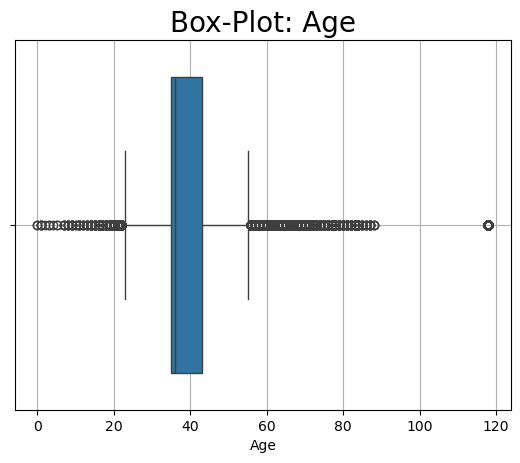

In [34]:
sns.boxplot(x= df['Age']) 
plt.title('Box-Plot: Age', size = 20)
plt.grid(True)
plt.show()

- Berdasarkan box-plot di atas, feature 'Age' memiliki Interquartile range yang tipis, di mana distribusi Q1 ke Q2 lebih sempit di bandingkan Q2 ke Q3. Dengan demikian merepresentasikan secara visual bagaimana sedikitnya variasi dari feature 'Age'. Karena fenomena di mana age group berdistribusi sangatlah kecil berkemungkinan dari umur 36 - 42, pada feature 'Age' akan lebih baik untuk mengkategorisasi feature tersebut karena banyaknya outliers yang berkluster bersamaan maupun itu terdapat pada lowerbound atau upperbound. Patterns pada feature ini juga akan terlihat lebih jelas, lebih mudah di interpretasi, dan juga mengurangi noise pada data. 

- Adanya 2 metode kategorisasi: Categorical Labels memisahkan umur berdasarkan kategori seperti Young Adult dan Middle-Age, sedangkan Fine-Grained memisahkan angka berdasarkan range yang ditentukan seperti '19-24' dan '25-30'. Di antara itu Categorical Labels tidak merupakan solusi yang baik untuk feature 'Age' karena konsep kategorikal yang abstrak dan subjektif mengenai pembagian range umur ke dalam kategori tersebut. Di mana Fine-Grained lebih objektif di karenakan secara visual masih mempertahankan nilai numeriknya

**`Solution:`** Mengkategorisasi feature 'Age' dengan 'Fine-Grained Binning'. 

Creating Feature 'Age Binning' --> 'Age' (Based of)

- [≤ 18]
- [19 - 24]
- [25 - 30]
- [31 - 36]
- [37 - 42]
- [43 - 48]
- [49 - 54]
- [55 - 60]
- [≥ 61] 

In [35]:
df['Age Binning'] = df['Age'].apply(lambda x: '≤ 18' if x < 19 else('19-24' if x < 25 else('25-30' if x < 31 else('31-36' if x < 37 else('37-42' if x < 43 else('43-48' if x < 49 else('49-54' if x < 55 else('55-60' if x < 61 else '≥ 61'))))))))

df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No,Asia,55-60
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No,Asia,31-36
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No,Asia,25-30
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No,North America,55-60
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No,Asia,25-30


### **Phase 2 (Data Transformation)**

**Investigating Zero(0) Commision** 

In [36]:
comm_agency = df['Commision (in value)'].value_counts().head(10)
print(comm_agency)

Commision (in value)
0.00     24725
7.70      1169
17.82     1096
23.76      895
6.30       800
11.88      726
29.70      665
9.10       644
10.50      597
41.58      511
Name: count, dtype: int64


In [37]:
df[df['Commision (in value)']== 0]['Product Name'].value_counts().head()

Product Name
Cancellation Plan                       12979
2 way Comprehensive Plan                 9341
1 way Comprehensive Plan                 2336
Individual Comprehensive Plan              48
Spouse or Parents Comprehensive Plan       13
Name: count, dtype: int64

In [38]:
df[df['Commision (in value)']== 0]['Duration'].value_counts().head(10)

Duration
6     790
7     765
5     754
2     746
4     745
8     743
3     727
9     650
11    616
10    614
Name: count, dtype: int64

In [39]:
df[df['Commision (in value)']== 0]['Destination'].value_counts().head()

Destination
SINGAPORE    2676
THAILAND     2537
CHINA        2498
MALAYSIA     2379
INDONESIA    1752
Name: count, dtype: int64

In [40]:
df[df['Commision (in value)']== 0]['Net Sales'].value_counts().head(10)

Net Sales
20.0     4070
10.0     3315
80.0      872
112.0     624
21.0      540
13.0      505
24.0      497
22.0      484
11.0      473
12.0      445
Name: count, dtype: int64

In [41]:
df[df['Commision (in value)']== 0]['Claim'].value_counts().head(10)

Claim
No     24591
Yes      134
Name: count, dtype: int64

In [42]:
prod_name = df['Product Name'].value_counts().head(10)
print(prod_name)

Product Name
Cancellation Plan                  12979
2 way Comprehensive Plan            9341
Rental Vehicle Excess Insurance     5980
Basic Plan                          3834
Bronze Plan                         2847
1 way Comprehensive Plan            2336
Value Plan                          1907
Silver Plan                         1552
Annual Silver Plan                   975
Ticket Protector                     765
Name: count, dtype: int64


In [43]:
df[df['Product Name']== 'Cancellation Plan']['Net Sales'].value_counts().head(10)

Net Sales
10.0    3315
80.0     840
13.0     505
11.0     473
12.0     445
14.0     416
15.0     386
16.0     365
17.0     343
19.0     316
Name: count, dtype: int64

Findings: 
- Komisi dengan jumlah 0 mendominasi dataset dengan jumlah kurang lebih 24,000 sample. 
- Dari komisi yang berjumlah 0, frekuensi terbesar dalam travel plan/policy yang berada pada fenomena tersebut adalah 'Cancellation Plan', '2 Way Comprehensive Plan', dan '1 Way Comprehensive Plan'. 
- Sample yang di mana agency mendapatkan komisi yang berjumlah 0 berada pada perjalanan yang tidak kurang dari 2 hari dan tidak lebih dari 11 hari. 
- Sepertinya tidak adanya hubungan besar atau kecil dari net sales dengan sample bernilai komisi 0, tetapi  net sales bernilai 10 dan 20 memiliki frekuensi yang cukup signifikan. 

Interpretation: 
- Berdasarkan pemeriksaan dataset yang sederhana dan research dari internet, plan asuransi yang berkomisi dengan nilai 0 sepertinya bukan termasuk dalam policy utama, melainkan bundle atau extensi yang dapat di beli oleh client, berdampingan dengan basic plan ataupun policy utama. Sifat dari bundle atau extensi adalah terpisah, dimana travel agency tetap mendapatkan komisi dari insurance policy tersebut tetapi tidak mendapatkan komisi secara spesifik/satuan dari bundle ataupun extension tersebut. Ini juga karena cancellation plan lebih sering sudah termasuk dalam berbagai macam policy, 1 way dan 2 way merupakan seperti opsi yang bisa di pilih oleh client, di mana comprehensive plan adalah basis dari variasi 1 way dan 2 way tersebut.
 
- Tidak hanyak ini, kemungkinan ada hubungan dari agreement dari kedua pihak agency dan perusahaan asuransi di mana apabila insurance policy tersebut memiliki nilai jual yang rendah, travel agency tidak mendapatkan komisi dan ini di dukung dengan 2 nilai net sales tertinggi terletak pada 10 dan 20. 

Interpretation 'Cancellation Plan': 
- Before: Sebelum investigasi dari fenomena komisi bernilai 0, unique value 'Cancellation Plan' di sangka insurance policy yang di cancel oleh para pelanggan berdasarkan hasil observasi di mana Null Values memiliki frekuensi yang tinggi dalam value tersebut.  
 
- After: Setelah investigasi dari fenomena komisi bernilai 0, perspektif lebih terbuka di mana banyaknya komisi bernilai 0 tidak hanya terdapat pada 'Cancellation plan' tetapi pada tipe plan asuransi yang memiliki karakteristik yang berbeda. Dan karena komisi bernilai 0 ini memiliki lebih banyak net sales di atas 0. Apabila dengan interpretasi awal(Before) 'Cancellation Plan' menganggap bahwa pelanggan yang membatalkan plan asuransi, apabila demikian kebanyakan data set akan bernilai 0 dalam feature 'Net Sales' di karenakan pembatalan sales akan mengakibatkan pendapatan Null pada komisi juga.   

Transformation follow-up: 
- Dikarenakan frekuensi dari nilai unik 0 pada feature 'Commision (in value)' sangat lah besar, feature tersebut telah kehilangan nilai continuous nya. Maka seperti feature 'Age', lebih baik untuk melakukan feature engineering berupa Boolean (Yes and No). Dengan metode ini akan membuat feature jauh lebih mudah untuk di interpretasi dan memudahkan prediksi melalui tree based model.  

**Creating Feature 'Commission (Y/N)' --> 'Commision (in value)' (Based of)**

In [44]:
df['Commission (Y/N)'] = df['Commision (in value)'].apply(lambda x: 'No' if x < 1 else 'Yes')

In [45]:
df['Commission (Y/N)'].value_counts() / len(df)

Commission (Y/N)
No     0.565715
Yes    0.434285
Name: count, dtype: float64

**Investigating Negative values in 'Net Sales'**

In [46]:
Net_Sales = df['Net Sales'].value_counts().head(10)
print(Net_Sales)

Net Sales
20.0    4215
10.0    3315
22.0    1655
0.0     1291
18.0    1145
26.0    1059
30.0     950
29.7     923
80.0     877
15.0     806
Name: count, dtype: int64


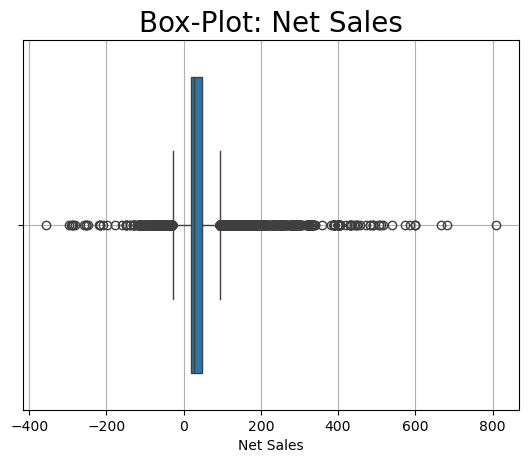

In [47]:
sns.boxplot(x= df['Net Sales']) 
plt.title('Box-Plot: Net Sales', size = 20)
plt.grid(True)
plt.show()

In [48]:
# Filtered Outliers > extreme lower bound
Outliers_ExNSDn = df[df['Net Sales'] < 0]
Outliers_ExNSDn.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N)
94,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,-216.75,54.19,36,No,Asia,31-36,Yes
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,430,AUSTRALIA,-59.40,35.64,41,No,Oceania,37-42,Yes
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,77,JAPAN,-29.70,17.82,59,No,Asia,55-60,Yes
199,EPX,Travel Agency,Online,Cancellation Plan,NaN,29,HONG KONG,-12.00,0.00,36,No,Asia,31-36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,57,AUSTRALIA,-59.40,35.64,28,No,Oceania,25-30,Yes


In [49]:
NS_LS0 = df[df['Net Sales']< 0]

result3 = pd.concat([
    NS_LS0['Distribution Channel'].value_counts(),
    NS_LS0['Claim'].value_counts(),
    NS_LS0['Commission (Y/N)'].value_counts()
], axis=1)

print(result3)


         count  count  count
Online   479.0    NaN    NaN
Offline    4.0    NaN    NaN
No         NaN  483.0  139.0
Yes        NaN    NaN  344.0


In [50]:
df[df['Net Sales']< 0]['Product Name'].value_counts().head(10)

Product Name
Rental Vehicle Excess Insurance    269
Cancellation Plan                   77
2 way Comprehensive Plan            52
Value Plan                          17
Basic Plan                          13
Bronze Plan                         10
Annual Silver Plan                   9
1 way Comprehensive Plan             8
Silver Plan                          7
Premier Plan                         7
Name: count, dtype: int64

In [51]:
df[df['Net Sales']< 0]['Duration'].value_counts().head(10)

Duration
25    10
17     9
23     9
33     8
22     8
34     8
58     7
16     7
30     6
20     6
Name: count, dtype: int64

In [52]:
df[df['Net Sales']< 0]['Destination'].value_counts().head(10)

Destination
AUSTRALIA         83
SINGAPORE         53
MALAYSIA          34
UNITED STATES     32
THAILAND          27
UNITED KINGDOM    24
CHINA             23
JAPAN             20
CANADA            14
FRANCE            13
Name: count, dtype: int64

In [53]:
df[df['Net Sales']< 0]['Commision (in value)'].value_counts().head(10)

Commision (in value)
0.00     137
17.82     39
23.76     38
29.70     28
41.58     27
35.64     26
11.88     24
5.94      19
59.40     16
47.52     16
Name: count, dtype: int64

Findings: 
- Berdasarkan value count, negatif Net Sales tidak berada pada urutan frekuensi terbesar. Walaupun dalam ilustrasi box-plot kedua positif dan negatif Net Sales memiliki proporsi yang mirip. 
- Kebanyakan dari negatif Net Sales tidak ada yang menghasilkan claim asuransi travel. 
- Mayoritas dari negatif Net Sales lebih banyak mendapatkan komisi dari penjualannya.
- Asuransi plan Rental Vehicle Excess Insurance memiliki kontributor terbanyak dari Net Sales bernilai negatif. 
- Durasi dan destinasi dari travel tidak memiliki interaksi yang signifikan dengan Net Sales negatif, walaupun Australia memiliki kontributor terbanyak dari Net Sales negatif tetapi tidak dalam range yang signifikan. 
- Kebanyakan dari negatif Net Sales menghasilkan komisi bernilai 0 di bandingkan nilai di atas 0.

Kesimpulan Pemeriksaan: 
- **`Sudah cukup informasi untuk menyimpulkan bahwa Net Sales bernilai negatif merupakan bentuk dari pendapatan diskon, insentif potongan harga(rebate), atau diskon seasonal.`**

Interpretasi: 
- Berdasarkan pemeriksaan dataset yang sederhana ada 3 feature yang mengsupport kalau Net Sales bernilai negatif berkemungkinan pendapatan berupa diskon atau potongan harga lainnya, yaitu tidak adanya claim, Rental Vehicle Excess Insurance merupakan salah satu extensi dari travel policy, dan komisi bernilai 0. 
- Plan yang mendapatkan tawaran potongan harga ataupun gratis berkemungkinan tidak memberikan insentif kepada pelanggan untuk mengclaim karena itu merupakan tawaran tambahan yang di berikan agency, bukan keharusan dari perspektif pelanggan.
- Dari kesimpulan sebelumnya Rental Vehicle Excess telah ditetapkan sebagai extensi dari policy asuransi, di mana bundle atau extensi sering di tawarkan dengan diskon di mana ini di sebut dengan 'Multi-Policy Discount'.  
- Perusahaan asuransi berkemungkinan tidak menawarkan komisi kepada Travel agency apabila value dari asuransi tersebut negatif. 

Transformation follow-up: 
- Berdasarkan box-plot feature 'Net Sales' terlihat cukup tersebar di mana akan sulit untuk menginterpretasi values secara individu. Makan akan dilakukannya kategorisasi menjadi feature 'Sales Deduction' hanya  dengan 2 unique values (Yes/No).   

**Feature 'Agency' Interpretation**

In [54]:
agency_cd = df['Agency'].value_counts().head(10)
print(agency_cd)

Agency
EPX    24656
CWT     5980
C2B     5753
JZI     4433
SSI      765
JWT      522
RAB      513
LWC      455
TST      354
KML      281
Name: count, dtype: int64


In [55]:
df[df['Claim']== 'Yes']['Agency'].value_counts().head()

Agency
C2B    407
EPX    133
CWT     64
LWC     29
JZI     22
Name: count, dtype: int64

- Berdasarkan dataset, feature 'Agency' sangatlah susah untuk di interpretasi. Di karenakan tidak ada informasi lebih mengenai agency tersebut seperti zip code ataupun negara asal. Bahkan informasi susah didapatkan melalui web setelah melakukan menginvestigasi Agency yang memiliki signifikan penting terhadap data dan claim yaitu EPX, CWT, C2B, JZI. Karena berkemungkinan sulitnya untuk melakukan interpretasi feature 'Agency' terhadap prediksi, lebih baik untuk di drop untuk mengurangi 'noise' data.     


Source(s): https://www.dnb.com/business-directory/company-profiles.c2b_llc.be9cc23df45c46ef3d0a7e4a368873d8.html | https://moneysmart.gov.au/check-and-report-scams/investor-alert-list#!c2b-exchange-c2bfund-top--2265 | https://www.mycwt.com/travel-consulting/case-studies/travel-services-outsourcing-insurance/ | https://www.jzieurope.com/news/jzi-refinances-fund-iii-portfolio-company-collingwood

**Creating Feature 'Sales Deduction' --> 'Net Sales' (Based of)**

In [56]:
df['Sales Deduction'] = df['Net Sales'].apply(lambda x: 'Yes' if x < 1 else 'No')

In [57]:
df['Sales Deduction'].value_counts() / len(df)

Sales Deduction
No     0.95725
Yes    0.04275
Name: count, dtype: float64

**Dropping 'Gender' & 'Agency' Column** 

In [59]:
# Keeping columns that is needed
columns_to_keep = ['Agency Type', 'Distribution Channel',
                   'Product Name', 'Duration', 'Destination',
                   'Net Sales', 'Commision (in value)', 'Age', 'Claim',
                   'Region', 'Age Binning', 'Commission (Y/N)', 'Sales Deduction']

df_ins = df[columns_to_keep]

df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency Type           44328 non-null  object 
 1   Distribution Channel  44328 non-null  object 
 2   Product Name          44328 non-null  object 
 3   Duration              44328 non-null  int64  
 4   Destination           44328 non-null  object 
 5   Net Sales             44328 non-null  float64
 6   Commision (in value)  44328 non-null  float64
 7   Age                   44328 non-null  int64  
 8   Claim                 44328 non-null  object 
 9   Region                44328 non-null  object 
 10  Age Binning           44328 non-null  object 
 11  Commission (Y/N)      44328 non-null  object 
 12  Sales Deduction       44328 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 4.4+ MB


**Dropping Unique Value ('Agency Type')**

Agency Type unique value Removal 

- Pada dataset ini terdapat dua jenis Agency Type yaitu Travel Agency dan Airlines. Di mana airlines menggambarkan agencies yang beroperasi secara langsung dengan maskapai yang berhubungan. Dan karena machine learning ini bertujuan untuk memprediksi claim asuransi travel dalam scope travel agency, maka pengedropan unique values 'Airlines' dalam feature 'Agency Type' sangatlah di perlukan. Di mana apabila di pertahankan, akan menimbulkan 'noise data' yang tidak searah dengan tujuan machine learning. Dan dengan proporsi dominan dari unique value 'Travel Agency' tidak memungkinkan untuk mengganggu kekayaan dataset. 

In [60]:
df_ins['Agency Type'].value_counts() / len(df_ins)

Agency Type
Travel Agency    0.724441
Airlines         0.275559
Name: count, dtype: float64

In [61]:
df_ins[df_ins['Agency Type']== 'Airlines']['Claim'].value_counts().head()

Claim
No     11776
Yes      439
Name: count, dtype: int64

In [62]:
df_ins[df_ins['Agency Type']== 'Travel Agency']['Claim'].value_counts().head()

Claim
No     31875
Yes      238
Name: count, dtype: int64

**Claim Rate (Travel Agency & Airlines)**

In [63]:
# Airlines
airlines_claim = 439
total_airsold = 12215
ClaimRt_airlines = (airlines_claim/total_airsold) * 100

# Travel Agency
tvagency_claim = 238
total_tvsold = 32113
ClaimRt_tvagency = (tvagency_claim/total_tvsold) * 100

In [64]:
print(f"Tipe agency Airlines memiliki claim rate bernilai {ClaimRt_airlines} dan Travel Agency memiliki claim rate bernilai {ClaimRt_tvagency}")

Tipe agency Airlines memiliki claim rate bernilai 3.5939418747441674 dan Travel Agency memiliki claim rate bernilai 0.7411328745367919


CLAIM RATE INTERPRETATION

- Berdasarkan claim rate dari kedua unique variables ini, tipe agency Airlines memiliki claim rate lebih tinggi (3.594%) di bandingkan Travel Agency (0.741%). Perbedaan dari kedua rate ini sangat signifikan di mana akan sangat merugikan kekayaan data apabila di drop begitu saja. 

Train Travel Agency and then Both
- Dikarenakan tujuan dari project & machine learning ini tetap dalam ruang lingku travel agency insurance, melakukan comparison performa dari model dengan elemen tipe agency airlines dan hanya travel agency saja adalah yang terbaik. Dengan meng-include unique value 'Airlines' akan di evaluasi apakah pattern claim pada Airlines agency akan membantu dan meng-improve claim prediction dan model machine learning pada project ini. 

Application

**`Tahap Pertama:`** Menggunakan data dengan unique variable 'Travel Agency' saja pada feature 'Agency Type'. 

**`Tahap Kedua:`** Menggunakan data dengan kedua unique variable 'Travel Agency & Airlines' pada feature 'Agency Type'

In [65]:
# Copy dataframe(df_ins) into another dataframe (df_full)
df_full = df_ins.copy()

- Syntax di atas memisah dataframe 'df_full' & 'df_ins' di mana dataframe 'df_full' akan menjadi dataset tahap kedua apabila setelah melakukan train dan prediksi pada tahap pertama. Dataframe 'df_full' bisa di callback untuk dimana unique value 'Airlines' telah di pertahankan pada dataframe 'df_full'

In [66]:
# Dropping unique value 'Airlines'
df_drop_new = df_ins.drop(df_ins[df_ins['Agency Type']== 'Airlines'].index, inplace=True)

C:\Users\Adhief R. Fanandi\AppData\Local\Temp\ipykernel_24056\2389647267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_new = df_ins.drop(df_ins[df_ins['Agency Type']== 'Airlines'].index, inplace=True)


In [67]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32113 entries, 1 to 44327
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency Type           32113 non-null  object 
 1   Distribution Channel  32113 non-null  object 
 2   Product Name          32113 non-null  object 
 3   Duration              32113 non-null  int64  
 4   Destination           32113 non-null  object 
 5   Net Sales             32113 non-null  float64
 6   Commision (in value)  32113 non-null  float64
 7   Age                   32113 non-null  int64  
 8   Claim                 32113 non-null  object 
 9   Region                32113 non-null  object 
 10  Age Binning           32113 non-null  object 
 11  Commission (Y/N)      32113 non-null  object 
 12  Sales Deduction       32113 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 3.4+ MB


In [68]:
df_ins['Agency Type'].value_counts() / len(df_ins)

Agency Type
Travel Agency    1.0
Name: count, dtype: float64

In [69]:
df_ins.head()

,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N),Sales Deduction
1,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No,Asia,31-36,No,No
3,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No,North America,55-60,No,No
5,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.0,36,No,Asia,31-36,No,No
6,Travel Agency,Online,1 way Comprehensive Plan,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No,Asia,31-36,No,No
7,Travel Agency,Online,Cancellation Plan,90,SINGAPORE,78.0,0.0,22,No,Asia,19-24,No,No


In [70]:
# Merubah nama dataframe
df_TrAg = df_ins

**Dropping 'Agency Type' Column**

- Keputusan untuk drop feature 'Agency Type' bertujuan untuk efisiensi model machine learning dan encoding pada fitur-fitur. 

In [71]:
# Keeping columns that is needed
columns_to_keep = ['Distribution Channel', 'Product Name', 'Duration', 'Destination',
                   'Net Sales', 'Commision (in value)', 'Age', 'Claim',
                   'Region', 'Age Binning', 'Commission (Y/N)', 'Sales Deduction']

df_TrAg = df_ins[columns_to_keep]

df_TrAg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32113 entries, 1 to 44327
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Distribution Channel  32113 non-null  object 
 1   Product Name          32113 non-null  object 
 2   Duration              32113 non-null  int64  
 3   Destination           32113 non-null  object 
 4   Net Sales             32113 non-null  float64
 5   Commision (in value)  32113 non-null  float64
 6   Age                   32113 non-null  int64  
 7   Claim                 32113 non-null  object 
 8   Region                32113 non-null  object 
 9   Age Binning           32113 non-null  object 
 10  Commission (Y/N)      32113 non-null  object 
 11  Sales Deduction       32113 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.2+ MB


## **Handling Outliers**

### **Investigating Distribution of Numerical Data**

In [72]:
# Numerical Features
num_features2 = df_TrAg.describe().columns.to_list()
num_features2

df_TrAg.describe()

,Duration,Net Sales,Commision (in value),Age
count,32113.000000,32113.000000,32113.000000,32113.000000
mean,41.997571,35.877162,7.510485,38.022888
std,54.832894,35.021212,19.662587,9.395629
min,0.000000,-297.000000,0.000000,0.000000
25%,10.000000,17.000000,0.000000,36.000000
50%,23.000000,26.000000,0.000000,36.000000
75%,52.000000,48.000000,0.000000,36.000000
max,531.000000,404.250000,262.760000,118.000000


Distribution [Duration, Net Sales, Commision (in value), Age]

<Axes: xlabel='Age', ylabel='Count'>

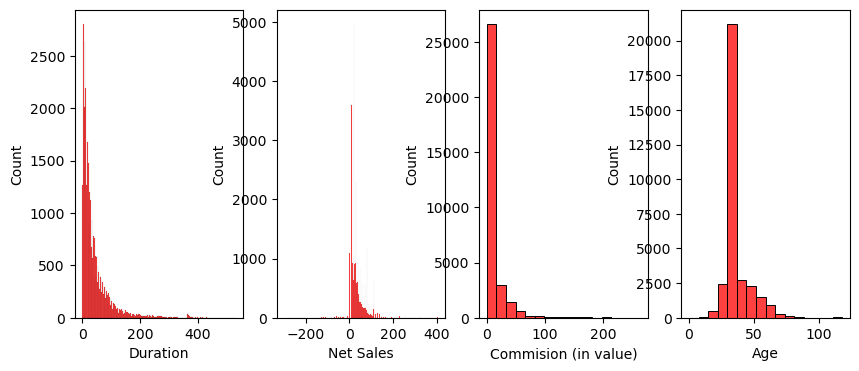

In [73]:
plt.figure(figsize = (10,4))
plt.subplot(1,4,1)
sns.histplot(df_TrAg['Duration'], color='red')
plt.subplot(1,4,2)
sns.histplot(df_TrAg['Net Sales'], color='red')
plt.subplot(1,4,3)
sns.histplot(df_TrAg['Commision (in value)'], color='red')
plt.subplot(1,4,4)
sns.histplot(df_TrAg['Age'], color='red')

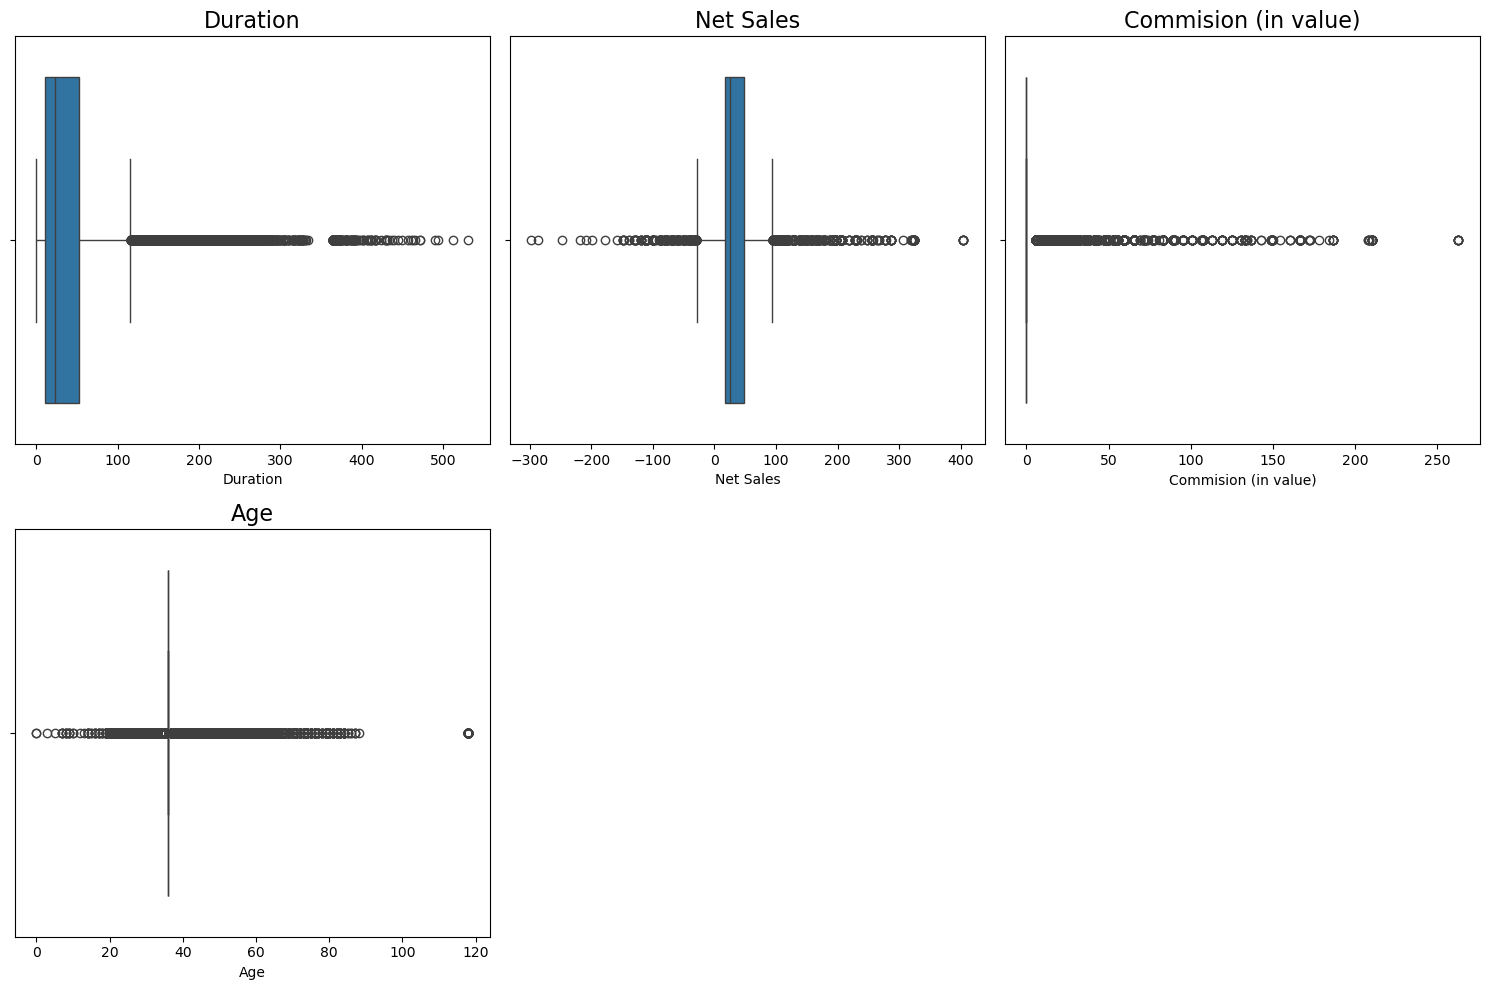

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features1 = df_TrAg.select_dtypes(include=['number']).columns  # Numeric columns
num_plots = len(num_features)  # Total features to plot

rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate rows dynamically

plt.figure(figsize=(15, 5 * rows))

for plotnumber, feature in enumerate(num_features, 1):
    ax = plt.subplot(rows, 3, plotnumber)
    sns.boxplot(x=feature, data=df_TrAg)
    plt.title(feature, fontsize=16)

plt.tight_layout()
plt.show()


In [75]:
df_TrAg['Age'].value_counts()

Age
36    16630
31     1486
35     1370
48      567
29      489
      ...  
13        1
12        1
5         1
88        1
3         1
Name: count, Length: 85, dtype: int64

- Berdasarkan statistik secara numerik dan visual terlihat bahwa keempat dari data numerik pada dataset memiliki distribusi yang sangat tidak normal.

- Setelah remove Agency type 'Airlines', feature 'Age' memiliki Q1, Q2, dan Q3 yang sama yaitu angka 36. Bisa di lihat dari atas bahwa alasan dari sedikitnya variasi pada feature 'Age' adalah banyaknya jumlah pelanggan berumur 36 dari dataset, kurang lebih mencakup setengah dari seluruh dataset. Box-plot di atas juga menunjukkan secara visual bahwa benar di mana feature 'Age' tidak memiliki variasi. 

- Karena fenomena di mana age group 36 memiliki frekuensi yang berlebih, feature 'Age' walaupun dalam format integer/numeric sangat menyimpang dari yang di sebut 'True numerical variables'. Di mana pada 'True numerical variables' memiliki berbagai macam values yang unique atau berbeda-beda, sedangkan dengan penemuan di mana terdapat frekuensi yang sangat tinggi pada nilai tunggal 36. Ini menunjukkan bahwa ciri khas dari feature ini menyimpang dari continuous number, melainkan lebih mendekati ke ciri khas kategorical. Meng-support keputusan untuk mengkategorisasi feature 'Age'

- Adanya variasi yang besar pada feature 'Duration' & 'Net Sales', berbeda seperti feature 'Commision (in value)' & 'Age' di mana variasi sangat lah sedikit dan terlihat sangat jelas dari grafik histogram sebelumnya
 
- Nilai lower-bound dari feature 'Net Sales' mencapai nilai negatif dan ini berkemungkinan adanya faktor diskon, insentif potongan harga(rebate), atau diskon seasonal.

**`Penanganan Outliers:`**
- Outliers akan di selidiki dan di tangani secara bertahap, bertahap tergantung tipe dan konteks dari outliers tersebut. 

**Global Outliers:**

- Feature 'Age' dengan data di atas 100.

**Contextual Outliers:**
- Feature 'Commision (in value)' dengan data di atas 250.
- Feature 'Duration'

### **Phase 1 (Global Outliers)**

**AGE greater than 100 years old**

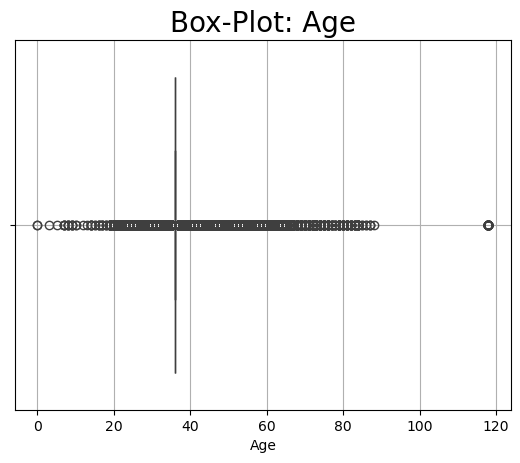

In [76]:
sns.boxplot(x= df_TrAg['Age']) 
plt.title('Box-Plot: Age', size = 20)
plt.grid(True)
plt.show()

In [77]:
# Filtered Outliers > extreme upper bound
Outliers_ExAgeUp = df_TrAg[df_TrAg['Age'] > 100]
Outliers_ExAgeUp.head(10)

,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N),Sales Deduction
1854,Offline,Comprehensive Plan,63,THAILAND,29.0,9.57,118,No,Asia,≥ 61,Yes,No
3961,Offline,Comprehensive Plan,8,THAILAND,29.0,9.57,118,No,Asia,≥ 61,Yes,No
4854,Offline,Comprehensive Plan,94,MALAYSIA,29.0,9.57,118,No,Asia,≥ 61,Yes,No
5356,Offline,Comprehensive Plan,34,THAILAND,0.0,9.57,118,No,Asia,≥ 61,Yes,Yes
6274,Offline,Comprehensive Plan,39,MALAYSIA,29.0,9.57,118,No,Asia,≥ 61,Yes,No
7251,Offline,2 way Comprehensive Plan,144,PHILIPPINES,20.0,0.00,118,No,Asia,≥ 61,No,No
7438,Offline,2 way Comprehensive Plan,162,SPAIN,68.0,0.00,118,No,Europe,≥ 61,No,No
9324,Offline,1 way Comprehensive Plan,29,PHILIPPINES,20.0,0.00,118,No,Asia,≥ 61,No,No
9543,Offline,Comprehensive Plan,4,MALAYSIA,29.0,9.57,118,No,Asia,≥ 61,Yes,No
11377,Offline,2 way Comprehensive Plan,20,AUSTRALIA,37.0,0.00,118,Yes,Oceania,≥ 61,No,No


In [78]:
count_outliersEXAGUP = len(Outliers_ExAgeUp.index)

print(f"Extreme outliers berdasarkan box-plot feature 'Age' di mana pelanggan berumur diatas 100 tahun sebanyak {count_outliersEXAGUP} pelanggan.")

Extreme outliers berdasarkan box-plot feature 'Age' di mana pelanggan berumur diatas 100 tahun sebanyak 59 pelanggan.


In [79]:
Age_100 = df_TrAg[df_TrAg['Age']> 100]

result2 = pd.concat([
    Age_100['Distribution Channel'].value_counts(),
    Age_100['Claim'].value_counts(),
    Age_100['Commission (Y/N)'].value_counts()
], axis=1)

print(result2)


         count  count  count
Offline   58.0    NaN    NaN
Online     1.0    NaN    NaN
No         NaN   56.0   29.0
Yes        NaN    3.0   30.0


In [80]:
df_TrAg[df_TrAg['Age']> 100]['Product Name'].value_counts().head(10)

Product Name
Comprehensive Plan                 27
2 way Comprehensive Plan           24
1 way Comprehensive Plan            3
Cancellation Plan                   2
Premier Plan                        2
Rental Vehicle Excess Insurance     1
Name: count, dtype: int64

In [81]:
df_TrAg[df_TrAg['Age']> 100]['Duration'].value_counts().head(10)

Duration
4     7
5     3
13    3
6     3
11    3
49    2
37    2
39    2
29    2
20    2
Name: count, dtype: int64

In [82]:
df_TrAg[df_TrAg['Age']> 100]['Destination'].value_counts().head(10)

Destination
THAILAND              16
MALAYSIA              16
CHINA                  4
UNITED STATES          3
PHILIPPINES            2
SPAIN                  2
Taiwan                 2
MYANMAR                2
INDONESIA              2
KOREA, REPUBLIC OF     1
Name: count, dtype: int64

In [83]:
df_TrAg[df_TrAg['Age']> 100]['Net Sales'].value_counts().head(10)

Net Sales
29.0     27
20.0      6
0.0       4
104.0     3
30.0      2
24.0      2
69.0      1
67.0      1
58.0      1
64.0      1
Name: count, dtype: int64

**AGE Lower 19 years old**

In [84]:
# Filtered Outliers > extreme lower bound
Outliers_ExAgeDn = df_TrAg[df_TrAg['Age'] < 19]
Outliers_ExAgeDn.head(10)

,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N),Sales Deduction
51,Offline,Comprehensive Plan,43,MALAYSIA,29.0,9.57,8,No,Asia,≤ 18,Yes,No
729,Offline,Child Comprehensive Plan,369,SINGAPORE,74.0,0.00,5,No,Asia,≤ 18,No,No
735,Offline,Travel Cruise Protect,31,MALAYSIA,30.0,10.50,14,Yes,Asia,≤ 18,Yes,No
2008,Offline,Child Comprehensive Plan,369,SINGAPORE,74.0,0.00,9,No,Asia,≤ 18,No,No
2832,Offline,Travel Cruise Protect,8,THAILAND,30.0,10.50,17,No,Asia,≤ 18,Yes,No
3940,Offline,Comprehensive Plan,282,MALAYSIA,29.0,9.57,9,No,Asia,≤ 18,Yes,No
6655,Offline,2 way Comprehensive Plan,68,"KOREA, REPUBLIC OF",61.0,0.00,13,No,Asia,≤ 18,No,No
7886,Offline,Child Comprehensive Plan,369,SINGAPORE,74.0,0.00,9,No,Asia,≤ 18,No,No
8565,Offline,Comprehensive Plan,29,MALAYSIA,29.0,9.57,8,No,Asia,≤ 18,Yes,No
10431,Offline,Comprehensive Plan,4,THAILAND,29.0,9.57,16,No,Asia,≤ 18,Yes,No


In [85]:
count_outliersEXAGDN = len(Outliers_ExAgeDn.index)

print(f"Extreme outliers berdasarkan box-plot feature 'Age' di mana pelanggan berumur dibawah 19 tahun sebanyak {count_outliersEXAGDN} pelanggan.")

Extreme outliers berdasarkan box-plot feature 'Age' di mana pelanggan berumur dibawah 19 tahun sebanyak 38 pelanggan.


In [86]:
Age_19 = df_TrAg[df_TrAg['Age']< 19]

result3 = pd.concat([
    Age_19['Distribution Channel'].value_counts(),
    Age_19['Claim'].value_counts(),
    Age_19['Commission (Y/N)'].value_counts()
], axis=1)

print(result3)


         count  count  count
Offline   35.0    NaN    NaN
Online     3.0    NaN    NaN
No         NaN   37.0    8.0
Yes        NaN    1.0   30.0


In [87]:
df_TrAg[df_TrAg['Age']< 19]['Product Name'].value_counts().head(10)

Product Name
Travel Cruise Protect                  18
Comprehensive Plan                      9
Child Comprehensive Plan                7
Single Trip Travel Protect Platinum     2
2 way Comprehensive Plan                1
Annual Travel Protect Gold              1
Name: count, dtype: int64

In [88]:
df_TrAg[df_TrAg['Age']< 19]['Duration'].value_counts().head(10)

Duration
364    3
8      3
369    3
94     2
5      2
62     2
70     1
40     1
22     1
11     1
Name: count, dtype: int64

In [89]:
df_TrAg[df_TrAg['Age']< 19]['Destination'].value_counts().head(10)

Destination
THAILAND              16
MALAYSIA              11
SINGAPORE              7
KOREA, REPUBLIC OF     1
Laos                   1
UNITED STATES          1
CHINA                  1
Name: count, dtype: int64

In [90]:
df_TrAg[df_TrAg['Age']< 19]['Net Sales'].value_counts().head(10)

Net Sales
 30.0     17
 29.0      9
 74.0      7
 61.0      1
 31.0      1
 256.2     1
 50.5      1
-30.0      1
Name: count, dtype: int64

Findings (Age > 100): 
- Tidak ada indikasi dimana sample berumur di atas 100 memiliki ciri khas kasus nyata. Yang mendekati adalah dari 58 client yang berumur di atas 100 tahun memesan produk asuransi melalui channel offline, dan ini merepresentasikan tingkah laku pelanggan berumur tua dimana mereka lebih prefer melakukan transaksi langsung ke lokasi. Data pelanggan yang melebihi umur 100 tahun tidak memiliki interaksi yang signifikan dengan feature lainnya pada dataset.  

Findings (Age < 19):
- Data pelanggan berumur 19 tahun kebawah juga tidak memiliki pattern atau interaksi yang signifikan dengan variable lainnya. Tetapi kedua tipe data umur lebih dari 100 tahun dan kurang dari 19 tahun memiliki kesamaan data yang menarik. Keduanya memiliki dua destinasi teratas yang sama yaitu Malaysia dan Thailand. Dan juga keduanya membeli plan asuransi melalui channel offline, selain itu keduanya sebagian besar tidak mengklaim asuransi. 

Penanganan: 
- Dikarenakan tidak ditemukannya pattern atau insight yang merepresentasikan ciri khas dari dua tipe data yang berbeda ini secara nyata, di tambah tidak adanya interaksi khusus dengan target variable ('Claim') maka untuk memperbaik proses pemodelan nanti, lebih baik untuk di drop dua jenis cluster data ini. 

**Dropping unique values from 'Age'**

In [91]:
# Dropping unique value '< 19 & > 100 years old'
df_TrAg.drop(df_TrAg[(df_TrAg['Age'] < 19) | (df_TrAg['Age'] > 100)].index, inplace=True)

C:\Users\Adhief R. Fanandi\AppData\Local\Temp\ipykernel_24056\1728311969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TrAg.drop(df_TrAg[(df_TrAg['Age'] < 19) | (df_TrAg['Age'] > 100)].index, inplace=True)


In [92]:
df_TrAg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32016 entries, 1 to 44327
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Distribution Channel  32016 non-null  object 
 1   Product Name          32016 non-null  object 
 2   Duration              32016 non-null  int64  
 3   Destination           32016 non-null  object 
 4   Net Sales             32016 non-null  float64
 5   Commision (in value)  32016 non-null  float64
 6   Age                   32016 non-null  int64  
 7   Claim                 32016 non-null  object 
 8   Region                32016 non-null  object 
 9   Age Binning           32016 non-null  object 
 10  Commission (Y/N)      32016 non-null  object 
 11  Sales Deduction       32016 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.2+ MB


### **Phase 2 (Contextual Outliers)**

**Commission Greater than 250**

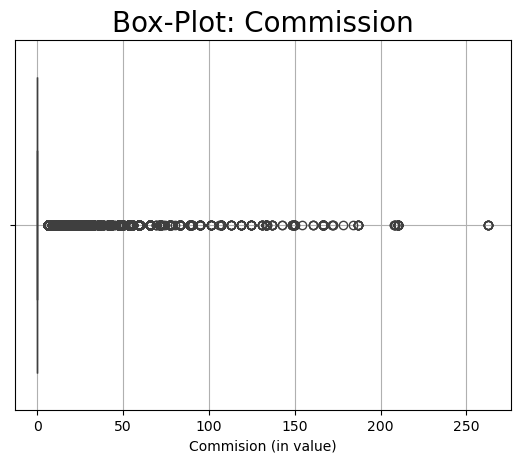

In [93]:
sns.boxplot(x= df_TrAg['Commision (in value)']) 
plt.title('Box-Plot: Commission', size = 20)
plt.grid(True)
plt.show()

In [94]:
# Filtered Outliers > extreme upper bound
Outliers_Com = df_TrAg[df_TrAg['Commision (in value)'] > 250]
Outliers_Com.head(6)

,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N),Sales Deduction
10325,Online,Annual Travel Protect Platinum,365,UNITED STATES,404.25,262.76,58,No,North America,55-60,Yes,No
14556,Online,Annual Travel Protect Platinum,378,UNITED STATES,404.25,262.76,45,No,North America,43-48,Yes,No
16613,Online,Annual Travel Protect Platinum,365,UNITED STATES,404.25,262.76,42,No,North America,37-42,Yes,No
23083,Online,Annual Travel Protect Platinum,364,UNITED STATES,404.25,262.76,44,No,North America,43-48,Yes,No
26407,Online,Annual Travel Protect Platinum,371,UNITED STATES,404.25,262.76,38,No,North America,37-42,Yes,No
39830,Online,Annual Travel Protect Platinum,369,UNITED STATES,404.25,262.76,51,No,North America,49-54,Yes,No


In [95]:
count_outliersCOM = len(Outliers_Com.index)

print(f"Extreme outliers berdasarkan box-plot feature 'Commision (in value)' di mana komisi yang bernilai diatas 250 sebanyak {count_outliersCOM} pelanggan.")

Extreme outliers berdasarkan box-plot feature 'Commision (in value)' di mana komisi yang bernilai diatas 250 sebanyak 6 pelanggan.


- Extreme outliers pada feature commission memiliki pattern yang penting di mana policy plan, destinasi negara, claim pattern yang sama. Sehingga sangat tidak menguntungkan apabila 6 sample ini di drop. 

**Investigating Duration Trips (Interquartile Range Method)**

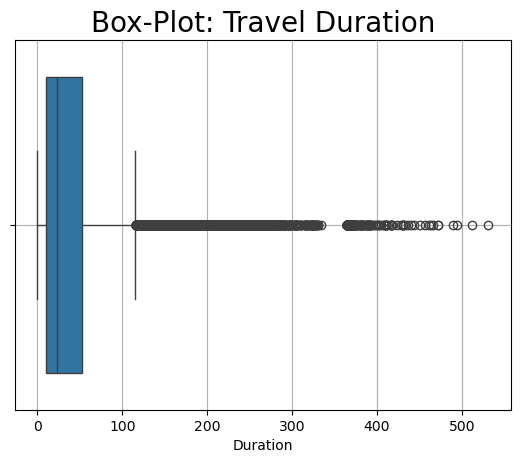

In [96]:
sns.boxplot(x= df_TrAg['Duration']) 
plt.title('Box-Plot: Travel Duration', size = 20)
plt.grid(True)
plt.show()

In [97]:
# Interquartile Range for 'Duration'
q1_dur = df_TrAg['Duration'].describe()['25%']
q3_dur = df_TrAg['Duration'].describe()['75%']

iqr_dur = q3_dur - q1_dur
iqr_dur

print(f"Range persebaran durasi travel wisatawan berada di antara {q1_dur} sampai {q3_dur} hari. Dan juga distribusi persebaran dari durasi travel wisatawan adalah {iqr_dur} hari.")

Range persebaran durasi travel wisatawan berada di antara 10.0 sampai 52.0 hari. Dan juga distribusi persebaran dari durasi travel wisatawan adalah 42.0 hari.


In [98]:
# Deteksi outliers
Upper_Bound_duration = q3_dur + 1.5 * iqr_dur
Upper_Bound_duration

115.0

In [99]:
# Filtered Outliers > upper bound
Outliers_duration = df_TrAg[df_TrAg['Duration'] > Upper_Bound_duration]
Outliers_duration

count_outliers = len(Outliers_duration.index)
print(f"Berdasarkan metode interquartile range method, telah di identifikasi upper outliers dalam column 'Duration' sebanyak {count_outliers}.")

Berdasarkan metode interquartile range method, telah di identifikasi upper outliers dalam column 'Duration' sebanyak 2374.


In [100]:
Outliers_duration.head()

,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N),Sales Deduction
50,Online,Annual Travel Protect Gold,370,CHINA,204.6,132.99,39,Yes,Asia,37-42,Yes,No
81,Online,Cancellation Plan,232,TURKEY,80.0,0.00,36,No,Asia,31-36,No,No
102,Online,2 way Comprehensive Plan,156,JAPAN,26.0,0.00,36,Yes,Asia,31-36,No,No
116,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.4,35.64,41,No,Oceania,37-42,Yes,Yes
131,Online,2 way Comprehensive Plan,151,UNITED STATES,112.0,0.00,69,No,North America,≥ 61,No,No


**Comparing Short & Long Trips**

Short-Trips(Holiday) = Berbasis dari kumpulan rata-rata long trip holiday dari benua Asia, Eropa, dan Australia yang menghasilkan rata-rata mermalam selama 10.6 hari pada musim libur. 

Long-Trips(Long Stay) = Berbasis dari upperbound outliers, di mana durasi travel di atas upperbound merepresentasikan outliers atau perjalanan long stay. Trip yang masuk dalam cluster ini lebih berkemungkinan mereka memiliki visa jangka panjang untuk stay di negara destinasi. 



Source(s): (https://investors.trip.com/news-releases/news-release-details/tripcom-group-highlights-golden-week-2024-travel-shifts-chinese/#:~:text=Already%2C%20the%20Group%20is%20witnessing%20hotel%20bookings,growth%20for%20stays%20has%20also%20grown%20year%2Don%2Dyear.) | (https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Tourism_trips_-_introduction_and_key_figures) | (https://www.abs.gov.au/articles/overseas-arrivals-and-departures-australia-2023-24-financial-year#strr-state-or-territory-of-residence)

In [101]:
Duration_114 = df_TrAg[df_TrAg['Duration']> 114]

result4 = pd.concat([
    Duration_114['Sales Deduction'].value_counts(),
    Duration_114['Claim'].value_counts(),
    Duration_114['Commission (Y/N)'].value_counts()
], axis=1)

print(result4)


     count  count  count
No    2200   2379   1698
Yes    208     29    710


In [102]:
Duration_11 = df_TrAg[df_TrAg['Duration']< 11]

result5 = pd.concat([
    Duration_11['Sales Deduction'].value_counts(),
    Duration_11['Claim'].value_counts(),
    Duration_11['Commission (Y/N)'].value_counts()
], axis=1)

print(result5)


     count  count  count
No    8391   8664   6925
Yes    313     40   1779


- Secara angka walaupun short-term trips memiliki jumlah Potongan harga, Claim, dan Komisi lebih besar. Dengan mempertimbangkan bagaimana proporsi dari sample short term trip yang lebih besar, rate dari sales deduction, claim asuransi, dan pendapatan komisi lebih besar pada travel jangka panjang.

In [103]:
df_TrAg[df_TrAg['Duration']> 114]['Product Name'].value_counts().head(10)

Product Name
Cancellation Plan                       912
2 way Comprehensive Plan                673
Rental Vehicle Excess Insurance         469
Annual Travel Protect Gold               62
Annual Travel Protect Silver             59
Comprehensive Plan                       51
1 way Comprehensive Plan                 51
Individual Comprehensive Plan            48
Annual Travel Protect Platinum           34
Spouse or Parents Comprehensive Plan     13
Name: count, dtype: int64

In [104]:
df_TrAg[df_TrAg['Duration']< 11]['Product Name'].value_counts().head(10)

Product Name
Cancellation Plan                      3821
2 way Comprehensive Plan               1918
Rental Vehicle Excess Insurance        1508
1 way Comprehensive Plan               1186
Travel Cruise Protect                    66
Single Trip Travel Protect Gold          55
Single Trip Travel Protect Silver        42
Value Plan                               39
Comprehensive Plan                       25
Single Trip Travel Protect Platinum      23
Name: count, dtype: int64

- Selain tipe plan extensi atau bundle, pada trip jangka panjang, pelanggan lebih memilih policy high end seperti gold, silver, comprehensive, dan platinum. Sedangkan trip untuk jangka pendek walaupun mereka memilih policy high end juga, para pelanggan lebih prefer pada single trip policy.  

In [105]:
df_TrAg[df_TrAg['Duration']> 114]['Destination'].value_counts().head(10)

Destination
UNITED STATES         257
AUSTRALIA             221
SINGAPORE             164
THAILAND              162
MALAYSIA              139
JAPAN                 137
PHILIPPINES           125
CHINA                 122
KOREA, REPUBLIC OF    108
UNITED KINGDOM        105
Name: count, dtype: int64

In [106]:
df_TrAg[df_TrAg['Duration']< 11]['Destination'].value_counts().head(10)

Destination
MALAYSIA       1611
SINGAPORE      1076
THAILAND       1067
INDONESIA       744
CHINA           695
AUSTRALIA       463
VIET NAM        373
HONG KONG       343
PHILIPPINES     275
INDIA           267
Name: count, dtype: int64

- Pelanggan pada perjalanan jangka panjang memiliki pilihan destinasi yang terbanyak pada negara Amerika Serikat, Australia, dan Singapura. Sedangkan perjalanan jangan pendek memiliki pilihan destinasi yang terbanyak pada negara Malaysia, Thailand, dan Singapore. 

In [107]:
df_TrAg[df_TrAg['Duration']> 114]['Net Sales'].value_counts().head(5)

Net Sales
20.0     181
0.0      125
10.0     123
80.0     107
112.0     68
Name: count, dtype: int64

In [108]:
df_TrAg[df_TrAg['Duration']< 11]['Net Sales'].value_counts().head(5)

Net Sales
20.0    1434
10.0    1310
29.7     349
0.0      288
19.8     239
Name: count, dtype: int64

- Tidak ada pattern yang signifikan di mana perjalanan jangka panjang dan pendek memiliki komposisi net sales yang relatif sama, kecuali terdapatnya harga 80 dan 112 pada perjalanan jangka panjang. 

In [109]:
df_TrAg[df_TrAg['Duration']> 114]['Age'].value_counts().head(5)

Age
36    1201
31     155
35      78
48      44
28      41
Name: count, dtype: int64

In [110]:
df_TrAg[df_TrAg['Duration']< 11]['Age'].value_counts().head(5)

Age
36    4577
35     446
31     388
48     137
34     124
Name: count, dtype: int64

- Perjalanan jangka panjang dan pendek memiliki age demographic yang mirip yaitu jangkauan umur 31 - 36. Akan tetapi hanya ada 1 pelanggan yang berumur 28 tahun pada perjalanan jangka panjang dalam frekuensi 5 besar dalam cluster tersebut. 

Kesimpulan Penanganan outliers feature 'Duration': 
- Walaupun terlihat seperti global outliers di mana dataset dalam jumlah melewati upperbound dari box-plot tersebut, karena satuan ukuran dari variable tersebut adalah hari, maka 500 hari travel menjadikan perjalanan stay di negara yang bersangkutan selama kurang dari 2 tahun. Jadi dari segi contextual sangatlah wajar dan tidak menguntungkan apabil di drop. 

**Checking data distribution after removal**

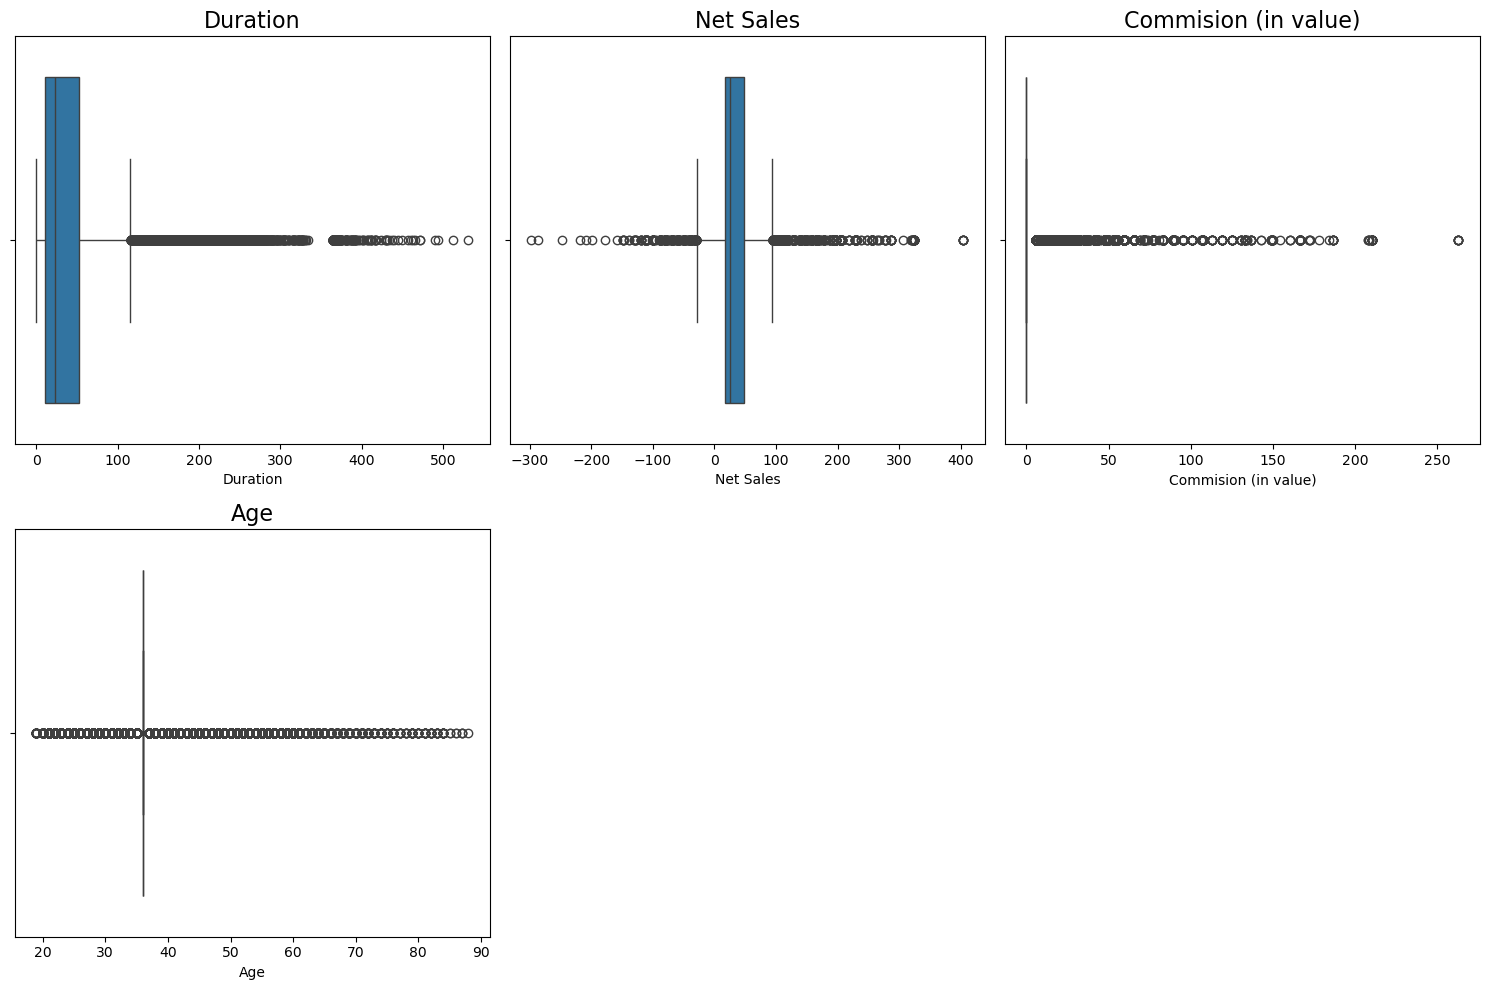

In [112]:
num_features1 = df_TrAg.select_dtypes(include=['number']).columns  # Numeric columns
num_plots = len(num_features)  # Total features to plot

rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate rows dynamically

plt.figure(figsize=(15, 5 * rows))

for plotnumber, feature in enumerate(num_features, 1):
    ax = plt.subplot(rows, 3, plotnumber)
    sns.boxplot(x=feature, data=df_TrAg)
    plt.title(feature, fontsize=16)

plt.tight_layout()
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

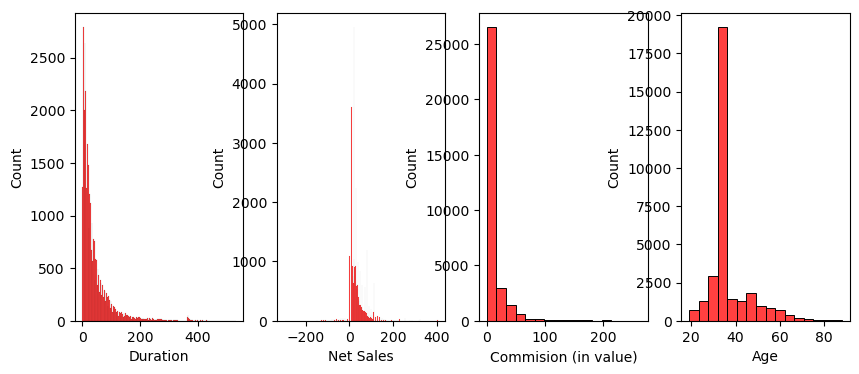

In [113]:
plt.figure(figsize = (10,4))
plt.subplot(1,4,1)
sns.histplot(df_TrAg['Duration'], color='red')
plt.subplot(1,4,2)
sns.histplot(df_TrAg['Net Sales'], color='red')
plt.subplot(1,4,3)
sns.histplot(df_TrAg['Commision (in value)'], color='red')
plt.subplot(1,4,4)
sns.histplot(df_TrAg['Age'], color='red')

## **Exploratory Data Analysis (EDA)**

### **Visualization Analysis**

**Pie Chart & Bar Graph**

- Sebagain Exploratory Analysis, akan dilakukan interaksi antar variable di seputar target variable dari machine learning yaitu 'Claim'

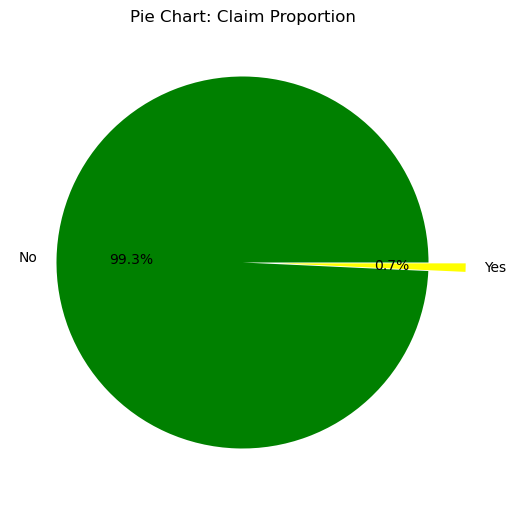

In [114]:
typee = df_TrAg["Claim"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["Green", "yellow"], explode = explode)
plt.title("Pie Chart: Claim Proportion")
plt.ylabel("") 
plt.show()

- Berdasarkan pie chart di atas terlihat sesudah data cleanign bahwa proporsi dari pelanggan yang claim asuransi travel adalah 0.7 %, dan seperti yang di jelaskan pada overview 'Project: Triumph' akan dilakukan metoda undersampling atau oversampling. 

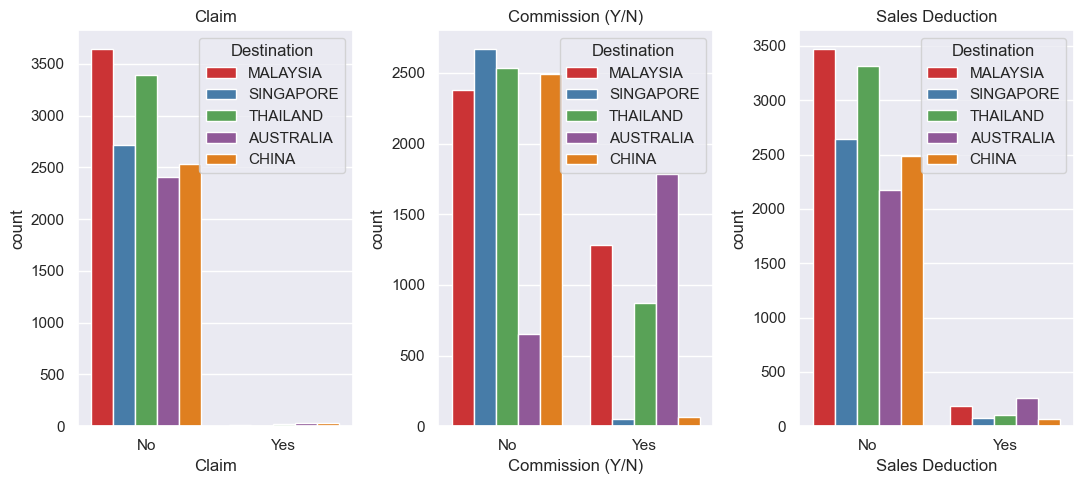

In [115]:
# Get the top 5 most frequent destinations
top5_country = df_TrAg['Destination'].value_counts().nlargest(5).index

# Filter dataset to include only top 5 destinations
df_filtered = df_TrAg[df_TrAg['Destination'].isin(top5_country)]

# Features to plot
features = ['Claim', 'Commission (Y/N)', 'Sales Deduction']
plt.figure(figsize=(11, 5))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 3, plotnumber)
    sns.countplot(x=feature, hue='Destination', data=df_filtered)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

plt.show()


In [116]:
df_TrAg[df_TrAg['Claim']== 'Yes']['Destination'].value_counts().head(10)

Destination
AUSTRALIA             28
CHINA                 27
UNITED STATES         27
THAILAND              21
MALAYSIA              15
UNITED KINGDOM        13
JAPAN                 11
KOREA, REPUBLIC OF     9
INDONESIA              8
VIET NAM               7
Name: count, dtype: int64

Bar Graph di atas memfokuskan interaksi negara 5 negara terbesar dalam dataset dengan feature Commission, Sales Deduction, dan Claim: 
- Negara Malaysia, Singapore, dan Thailand adalah negara destinasi yang tidak banyak mendapatkan potongan sales asuransi travel. Sedangkan Australia dan Malaysia mendapatkan potongan sales asuransi yang teratas. 
- Dengan penjualan policy asuransi travel bagi para agency, Australia dan Malaysia adalah negara teratas yang menghasilkan pendapatan komisi kepada travel insurance agency. Sebaliknya Singapore, Thailand, China, dan Malaysia termasuk dalam kontributor negara destinasi di mana agency tidak mendapatkan komisi dari hasil penjualan policy asuransi travel. 
- Bar chart dari banyak nya pelanggan yang meng-claim asuransi mereka sangatlah sedikit yang tervisualisasikan dari bargraph yang terlihat kecil pada negara Australia dan China. Karena itu lebih baik untuk di tampilkan dengan frequency distribution sehingga terlihat jelas bahwa United States dan Thailand memiliki frekuensi signifikan selain Australia dan China.  

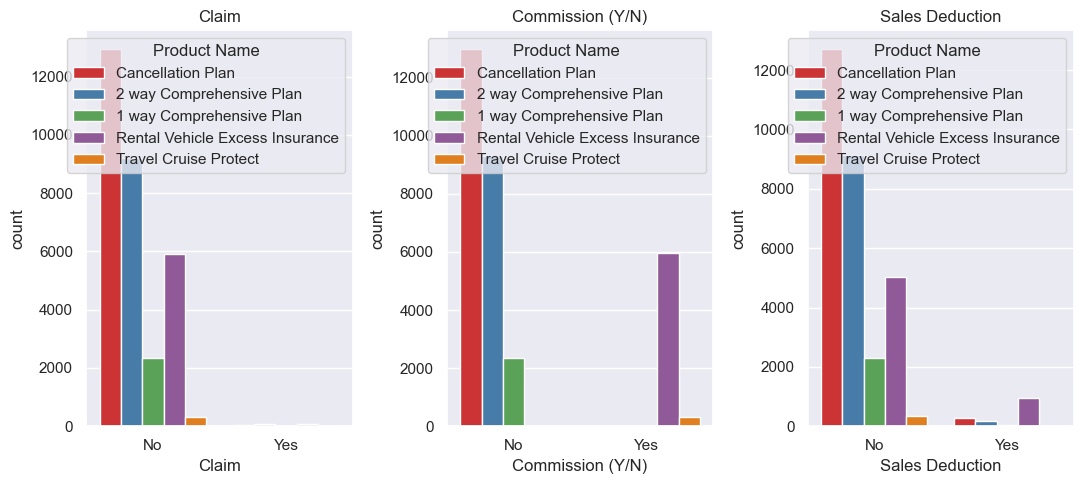

In [117]:
# Get the top 5 most frequent destinations
top5_product = df_TrAg['Product Name'].value_counts().nlargest(5).index

# Filter dataset to include only top 5 destinations
df_filtered1 = df_TrAg[df_TrAg['Product Name'].isin(top5_product)]

# Features to plot
features = ['Claim', 'Commission (Y/N)', 'Sales Deduction']
plt.figure(figsize=(11, 5))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 3, plotnumber)
    sns.countplot(x=feature, hue='Product Name', data=df_filtered1)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

plt.show()

In [118]:
df_TrAg[df_TrAg['Claim']== 'Yes']['Product Name'].value_counts().head(10)

Product Name
2 way Comprehensive Plan               94
Rental Vehicle Excess Insurance        64
Cancellation Plan                      31
Annual Travel Protect Gold              7
Single Trip Travel Protect Gold         7
1 way Comprehensive Plan                6
Single Trip Travel Protect Platinum     5
Single Trip Travel Protect Silver       4
Annual Travel Protect Silver            4
Comprehensive Plan                      3
Name: count, dtype: int64

Bar Graph di atas memfokuskan interaksi dari 5 jenis travel insurance policy terbesar dalam dataset dengan feature Commission, Sales Deduction, dan Claim: 
- Insurance policy Rental Vehicle memiliki frekuensi tertinggi dari semua plan yang mendapatkan pemotongan sales, sedangkan cancellation plan adalah policy terbanyak yang tidak mendapatkan pemotongan sales. 
- Rental Vehicle insurance policy memiliki jumlah terbanyak dari plan yang menghasilkan komisi bagi Travel Agency yang ada di dataset, sedangkan cancellation plan adalah policy yang tidak menghasilkan komisi teratas terhadap agency. 
- Bar plot claim tidak dapat memvisualisasikan frekuensi terbanyak dari insurance policy yang di claim oleh pelanggan dalam dataset, sehingga perlu menggunakan frequency distribution. Di mana terlihat bahwa 2 way comprehensive plan dan rental vehicle excess insurance merupaka dua tipe policy yang terbanyak di claim oleh pelanggan. 

<Figure size 1200x600 with 0 Axes>

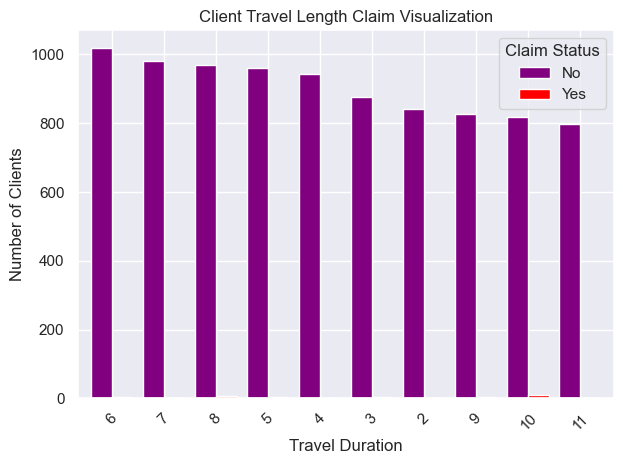

In [119]:
# Group by 'Duration' and 'Claim', then count occurrences
TrDuration_Claim = df_TrAg.groupby(['Duration', 'Claim']).size().unstack(fill_value=0)

# Select the top 10 durations based on total claim count (both approved and denied)
top_10_durations = TrDuration_Claim.sum(axis=1).nlargest(10).index

# Filter the DataFrame to keep only the top 10 durations
TrDuration_Claim = TrDuration_Claim.loc[top_10_durations]

# Plot
plt.figure(figsize=(12, 6))
TrDuration_Claim.plot(kind='bar', stacked=False, color=['purple', 'red'], width=0.8)

plt.xlabel('Travel Duration')
plt.ylabel('Number of Clients')
plt.title('Client Travel Length Claim Visualization')
plt.legend(['No', 'Yes'], title="Claim Status")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
df_TrAg[df_TrAg['Claim']== 'Yes']['Duration'].value_counts().head(10)

Duration
10    10
8      8
21     7
12     7
22     6
17     6
3      5
9      5
38     5
6      4
Name: count, dtype: int64

- Tidak ada pattern yang signifikan antara policy asuransi travel yang di claim oleh pelanggan dengan durasi travel mereka.  

**Box-Plot**

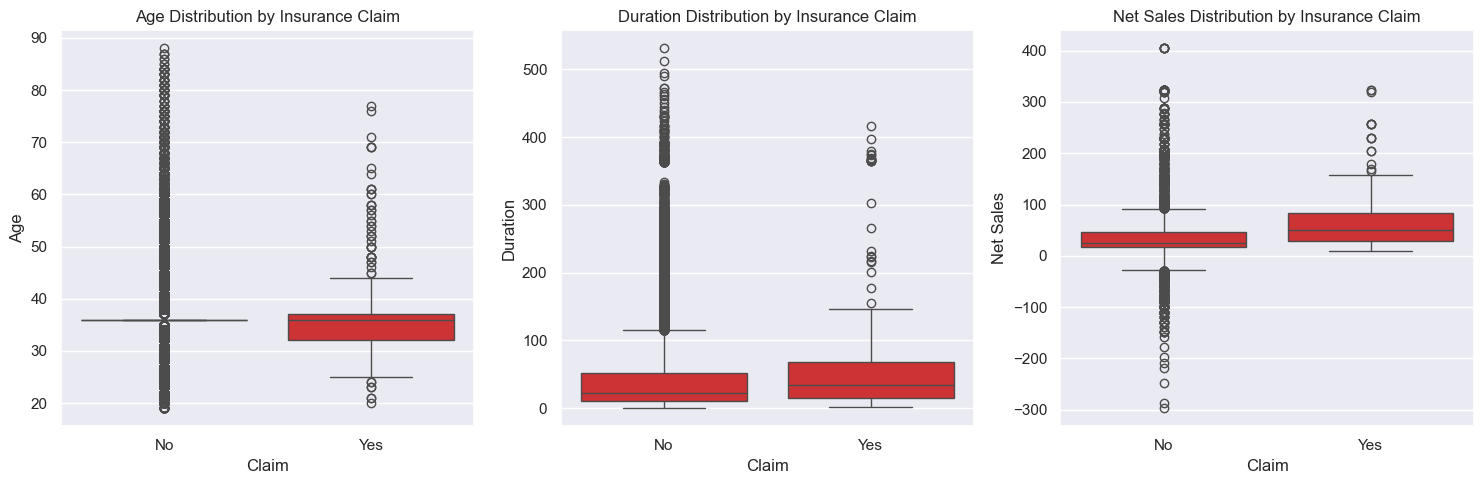

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1-row, 3-column layout

# sebaran umur pada claim dan non-churn pelanggan
sns.boxplot(x='Claim', y='Age', data=df_TrAg, ax=axes[0])
axes[0].set_title('Age Distribution by Insurance Claim')

# sebaran panjang waktu travel pada claim dan non-churn pelanggan
sns.boxplot(x='Claim', y='Duration', data=df_TrAg, ax=axes[1])
axes[1].set_title('Duration Distribution by Insurance Claim')

# sebaran Net Sales pada claim dan non-churn pelanggan
sns.boxplot(x='Claim', y='Net Sales', data=df_TrAg, ax=axes[2])
axes[2].set_title('Net Sales Distribution by Insurance Claim')

plt.tight_layout() 
plt.show()

Interksi pada 3 perbandingan antar boxplot in berpusat kepada apakah pelanggan meng-claim asuransi atau tidak: 
- Claim 'Yes'pada distribusi net sales memiliki median yang lebih tinggi di banding claim 'No'. Range net sales dari pelanggan yang meng-claim asuransi berada pada range bernilai 30 - 80. Sedangkan range net sales dari pelanggan yang tidak meng-claim asuransi kurang lebih berada pada range 20 - 50. Ini bisa mencerminkan pattern di mana semakin besar harga sales suatu insurance policy semakin berkemungkinan pelanggan meng-claim plan tersebut. Ini bisa disebabkan oleh kompleksitas dari policy berharga mahal memiliki banyak extensi atau add-on asuransi di mana extra feature itu bisa menambah skenario yang memungkinkan akan terjadinya kepada pelanggan. Di mana plan asuransi yang simple dan memiliki nilai rendah cendrung lebih spesifik mengenai hal-hal atau scenario di mana pelanggan dapat meng-claim asuransi tersebut. Ini juga bisa di sebabkan oleh distribusi data dari claim 'No' sehingga berangka rendah dikarenakan banyaknya agregasi angka dari dataset tersebut. 

- Seperti yang terdapat pada 'Net Sales', claim 'Yes' memiliki range durasi travel yang lebih tinggi antara 25 - 75 hari di bandingkan oleh claim 'No' yang memiliki jangkauan kurang lebih 15 - 50 hari. Semakin panjang waktu perjalanan pelanggan, semakin besar kemungkinan mereka untuk meng-claim insurance policy tersebut. Atau ini juga bisa disebabkan oleh distribusi data pada claim 'No' yang skewed. 

- Pada feature 'Age' pelanggan umur 36 lebih bercluster pada claim 'No', sedangkan claim 'Yes' data point lebih tersebar dan memiliki  rang umur kurang lebih antara 32 - 38 tahun, dengan median 36 tahun. Pelanggan antar umur sekitar 32 - 38 tahun memiliki kemungkinan besar untuk meng-claim asuransi travel, akan tetapi pelanggan yang spesifik berumur 36 tahun lebih banyak tidak meng-claim asuransi travel. Walaupun umur 36 tahun termasuk juga pada range 32 - 38 tahun. Oleh karena itu pelanggan yang claim atau tidak berdasarkan umur, memiliki titik data yang mirip.  

### **Relationship Analysis**

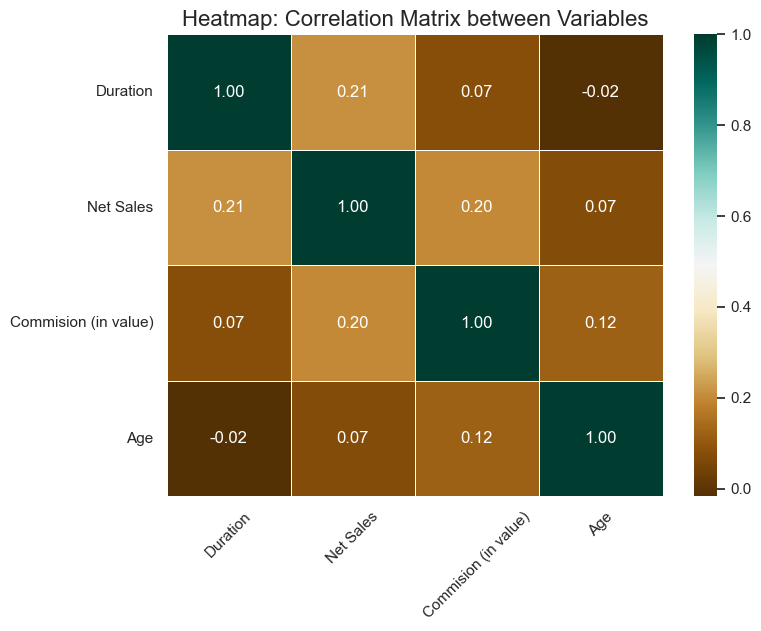

In [122]:
correlation_matrix = df_TrAg[['Duration', 'Net Sales', 'Commision (in value)','Age']].corr(method='spearman')


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="BrBG", linewidths=0.5)

plt.title("Heatmap: Correlation Matrix between Variables", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- Berdasarkan Correlation Matrix di atas tidak ada korelasi yang secara signifikan sangat tinggi, di mana ini sangatlah baik untuk model machine learning. Dengan begitu dapat meminimalisir terjadinya Multicollinearity dan Redundancy pada data yang dapat menyebabkan model tidak efisien. Selain itu data juga berkemungkinan lebih sensitif terhadap perubahan data. 

- Hanya pada skala 0.2 dan 0.21 yang memiliki nilai korelasi yang tinggi, yang terdapat pada hubungan 'Net Sales' --> 'Duration' & 'Net Sales' --> 'Commision (in value)'. 

**Relationship between 'Net Sales' with 'Duration' and 'Commision (in value')**

C:\Users\Adhief R. Fanandi\AppData\Local\Temp\ipykernel_24056\978475468.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_TrAg,


<Axes: title={'center': 'Hubungan antara Jumlah Net Sales vs Durasi Travel'}, xlabel='Net Sales', ylabel='Duration'>

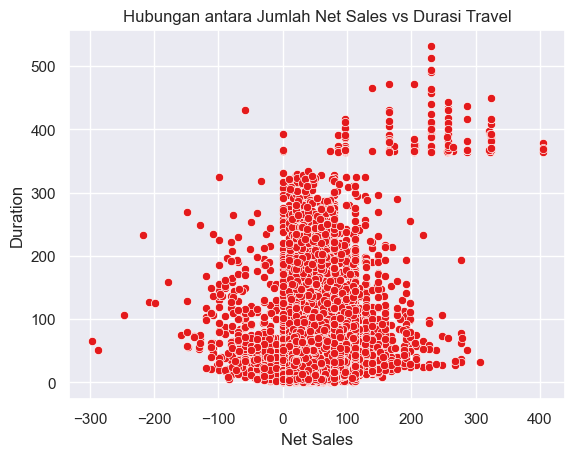

In [123]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah Net Sales vs Durasi Travel')
sns.scatterplot(data=df_TrAg, 
                y='Duration', 
                x='Net Sales', 
                palette=my_pallate)

- Berdasarkan scatterplot di atas, kebanyakan data bercluster pada angka Net Sales -100 sampai 200 dan Duration 0 - 300 hari. Semakin besarnya net sales tidak merepresentasikan lamanya pelanggan berwisata. Hanya satu kejadian di mana semakin berkurangnya diskon atau rebate yang di terima oleh pelanggan, semakin cendru mereka berwisata lebih lama, dan kurang lebih maksimal pada 200 hari.  

C:\Users\Adhief R. Fanandi\AppData\Local\Temp\ipykernel_24056\1554924447.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_TrAg,


<Axes: title={'center': 'Hubungan antara Jumlah Net Sales vs Durasi Travel'}, xlabel='Net Sales', ylabel='Commision (in value)'>

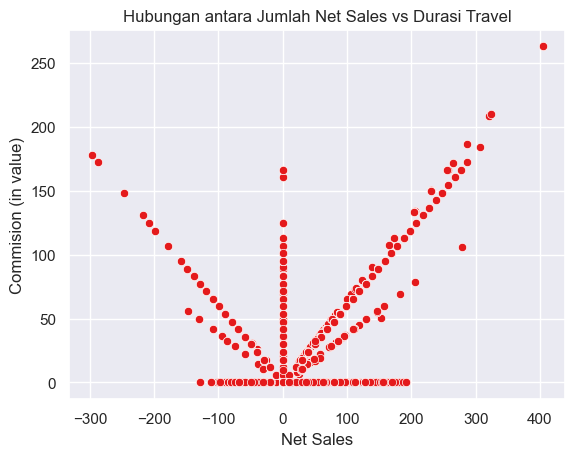

In [124]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah Net Sales vs Durasi Travel')
sns.scatterplot(data=df_TrAg, 
                y='Commision (in value)', 
                x='Net Sales', 
                palette=my_pallate)

- Berdasarkan scatterplot di atas, trlihat adanya sifat ascending atau descending pada data point. Semakin tinggi nilai net sales, semakin tinggi juga nilai komisi yang di terima oleh travel agency. Ini merupakan sifat umum/lazim di mana potongan komisi akan naik apabila kuantitas dari nilai sales juga tinggi. 

- Sifat yang kedua merupakan semakin rendah potongan harga sales insurance policy yang terjual, smeakin berkurang juga nilai komisi yang di terima oleh travel agency. Scenario di mana travel agency masi mendapatkan komisi bernilai positif bisa terjadi pada 2 dua kemungkinan, dan in tergantung aturan antar dua pihak travel agency dan perusahan asuransi tersebut. Pertama apabila pelanggan meng-cancel plan asuransi tetapi travel agency masi berhak untuk mempertahankan komisi yang di dapatkan saat pembelian policy asuransi. Kedua apabila pelanggan meng-claim travel asuransi mereka, di mana claim itu tidak berpengaruh kepada komisi yang mereka dapatkan sebelumnya. Dengan lain kata perusahaan asuransi saja yang menanggung potongan atau loss dari transaksi tersebut.

- Ada juga kejadian di mana dapat atau tidak dapatnya komisi tidak di pengaruhi oleh nilai dari Net Sales tersebut. Oleh karena itu di dugga bahwa perjanjian antara agency dan perusahaan asuransi sangatlah berpengaruh. 

## **Encoding**

In [125]:
df_TrAg.head()

,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N),Sales Deduction
1,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No,Asia,31-36,No,No
3,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No,North America,55-60,No,No
5,Online,Cancellation Plan,2,SINGAPORE,10.0,0.0,36,No,Asia,31-36,No,No
6,Online,1 way Comprehensive Plan,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No,Asia,31-36,No,No
7,Online,Cancellation Plan,90,SINGAPORE,78.0,0.0,22,No,Asia,19-24,No,No


### **Split Data & Encode Target Variable (y)**

In [126]:
X = df_TrAg.drop(columns=['Claim'])  
y = df_TrAg['Claim']                

In [127]:
y.value_counts()/len(y)

Claim
No     0.992691
Yes    0.007309
Name: count, dtype: float64

- Travel insurance claim memang termasuk dalam skenario imbalance di mana kelas minoritas merupakan output yang tidak wajar. Karena dalam kasus dunia nyata dalam konteks asuransi, apabila pelanggan yang meng-claim asuransi merupakan mayoritas dari dataset, perusahaan atau agency yang terkait akan kehilangan banyak profit dan itu tidak menguntungkan bagi kedua pihak yaitu perusahaan asuransi dan agency. 
- Model, terutama model klasifikasi cendrung akan mengabaikan kelas minoritas dalam dataset ataupun per feature. 

**Encode Target Variable (y)**

In [128]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

- Encode target variable secara terpisah dikarenakan dataframe sudah di split, di mana target variable masih dalam boolean (Yes/No). Dan untuk menghindari data leakage, maka di lakukan sebelum split data. 

In [129]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_enc,
    test_size=0.2,
    random_state=2000
)

In [130]:
df_TrAg.describe(include='object').T

,count,unique,top,freq
Distribution Channel,32016,2,Online,31365
Product Name,32016,18,Cancellation Plan,12977
Destination,32016,132,MALAYSIA,3657
Claim,32016,2,No,31782
Region,32016,7,Asia,23387
Age Binning,32016,8,31-36,20688
Commission (Y/N),32016,2,No,24688
Sales Deduction,32016,2,No,30500


**Encode Planning (Summarize)**

Feature Encoding: 

- One Hot Encoding --> 'Distribution Channel', 'Commission (Y/N)', 'Sales Deduction'

- Binary Encoding --> 'Product Name', 'Destination', 'Region'

- Ordinal Encoding --> 'Age Binning'


Feature Scaling: 

- Robust Scaler

Resampling (Over or Under?): 

- SMOTE 


**Technique Justification**

- One Hot Encoding --> Feature 'Distribution Channel', 'Commission (Y/N)', 'Sales Deduction' tidak memiliki sifat urutan yang signifikan, dan dengan dimensi yang relatif rendah dengan unique values tidak lebih dari 2. 

- Binary Encoding --> Dimana feature 'Product Name', 'Destination', 'Region' bersifat 'High Cardinality' dan apabila menggunakan one-hot akan memperlambat komputasi, memakan kapasitas memori yang cukup tinggi, dan berpotensi untuk overfit. 

- Ordinal Encoding --> Hanya feature 'Age Binning' yang memiliki kelompok umur yang bersegmen dan juga bersifat ordinal/berurutan. 

- Robust Scaler --> Hanya scaler ini perlu digunakan karena sifat outliers dari dataset ini banyak secara contextual dan untuk memelihara kekayaan data. Berbeda dengan MinMax dan Standard di mana lebih mengandalkan uniformity atau sifat normal dari distribusi data.  

- SMOTE --> SMOTE merupakan metode oversampling dimana merubah proporsi dari target variable yang condong ke satu arah, menjadi proporsi yang sama dimana berdasarkan karakteristik data minor dapat menciptakan synthetic data. Apabila tidak di tangani akan menyebabkan performa generalisasi yang buruk, dan mengihndari hilangnya kekayaan data predictor apabile melakukan metode undersampling.   

**Preparing Techniques for Modeling & Pre-Processing**

In [131]:
# resampling
smote = SMOTE(random_state=0)

# Classification Model
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier(max_depth=3)
rdmforst = RandomForestClassifier(n_estimators=50, max_depth=4, max_features="sqrt", random_state=42)
# rdmfor = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# boosting
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, scale_pos_weight=10, random_state=42)
ada = AdaBoostClassifier(tree, n_estimators=50, learning_rate=0.5, random_state=42) 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, max_features="sqrt", random_state=42)
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, scale_pos_weight=10, random_state=42)

# scaler
robust = RobustScaler()

### **Pipeline & Transformer**

In [132]:
df_TrAg['Age Binning'].unique()

array(['31-36', '55-60', '19-24', '25-30', '43-48', '49-54', '≥ 61',
       '37-42'], dtype=object)

In [133]:
import category_encoders as ce

ordinal_mapping = [    
    {'col': 'Age Binning', 'mapping': {None: 0, '19-24': 1, '25-30': 2, '31-36': 3, '37-42': 4, '43-48': 5, '49-54': 6, '55-60': 7, '≥ 61': 8}} 
]

ordinal = ce.OrdinalEncoder(mapping=ordinal_mapping)

In [134]:
# pipeline
pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Age Binning'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Age Binning']),
    ('onehot', OneHotEncoder(drop='first'), ['Distribution Channel', 'Commission (Y/N)', 'Sales Deduction']),
    ('robust', RobustScaler(), ['Age', 'Duration', 'Net Sales', 'Commision (in value)']),
    ('binary', BinaryEncoder(), ['Product Name', 'Destination', 'Region'])
], remainder='passthrough')

## **Modeling**

### **1st Model (With Travel Agency Dataset)**

In [135]:
from sklearn.model_selection import cross_val_score

# Define models dalam bentuk dictionary
models = {
    "Logistic Regression": logreg,
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rdmforst,
    "LightGBM": lgbm,
    "AdaBoost": ada,
    "Gradient Boosting": gbc,
    "XGBoost": xgbc
}

# Tampungan hasil
nilai_mean = []
nilai_std = []
list_all = []

# Apply transformasi
X_transformed = transformer.fit_transform(X)

# Apply SMOTE to handle imbalance
X_resampled, y_resampled = smote.fit_resample(X_transformed, y_enc)

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    nilai_mean.append(scores.mean())
    nilai_std.append(scores.std())
    list_all.append(scores)

# Create DataFrame for results
results_df = pd.DataFrame({
    'model': list(models.keys()),
    'mean': nilai_mean,
    'std': nilai_std,
    'all_score': list_all
})

# Display results
print(results_df)


c:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

[LightGBM] [Info] Number of positive: 25426, number of negative: 25425
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5396
[LightGBM] [Info] Number of data points in the train set: 50851, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500010 -> initscore=0.000039
[LightGBM] [Info] Start training from score 0.000039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\skle

                 model      mean       std  \
0  Logistic Regression  0.705871  0.005020   
1                  KNN  0.965059  0.001627   
2        Decision Tree  0.778035  0.002036   
3        Random Forest  0.800485  0.003967   
4             LightGBM  0.825436  0.001643   
5             AdaBoost  0.973192  0.004550   
6    Gradient Boosting  0.922960  0.005754   
7              XGBoost  0.824004  0.003229   

                                           all_score  
0  [0.715252104145363, 0.7040824353024463, 0.7001...  
1  [0.9657043970738614, 0.9620073940061354, 0.965...  
2  [0.7785731141351373, 0.7767639424211437, 0.774...  
3  [0.8050027530873909, 0.8010697711004484, 0.793...  
4  [0.8237237473452371, 0.8267914732950523, 0.823...  
5  [0.964367183198301, 0.9762447887988673, 0.9732...  
6  [0.9117438842130103, 0.9237001494533155, 0.926...  
7  [0.8260835365374026, 0.8260048768976638, 0.818...  


In [136]:
# Display results
results_df.head(8)

,model,mean,std,all_score
0,Logistic Regression,0.705871,0.005020,"[0.715252104145363, 0.7040824353024463, 0.7001..."
1,KNN,0.965059,0.001627,"[0.9657043970738614, 0.9620073940061354, 0.965..."
2,Decision Tree,0.778035,0.002036,"[0.7785731141351373, 0.7767639424211437, 0.774..."
3,Random Forest,0.800485,0.003967,"[0.8050027530873909, 0.8010697711004484, 0.793..."
4,LightGBM,0.825436,0.001643,"[0.8237237473452371, 0.8267914732950523, 0.823..."
5,AdaBoost,0.973192,0.004550,"[0.964367183198301, 0.9762447887988673, 0.9732..."
6,Gradient Boosting,0.922960,0.005754,"[0.9117438842130103, 0.9237001494533155, 0.926..."
7,XGBoost,0.824004,0.003229,"[0.8260835365374026, 0.8260048768976638, 0.818..."


Code: 
- Coding di atas adalah untuk menampung beberapa macem model klasifikasi dan mnampilkan output berupa mean & std untuk seleksi best model klasifikasi. 
- Karena tidak aspek interpretasi dari feature coding tersebut tidak perlu di tekankan, maka transformasi feature dan SMOTE dilakukan dalam satu box coding untuk efisiensi coding juga.
- Cross validation juga termasuk dalam bagian ini untuk mengkomputasi berbagai macam kombinasi scoring dari tiap model dan scoring itu sebagai estimasi seberapa bagus model dapat memprediksi unseen data. 

Which Model is best?
- Berdasarkan hasil scoring, terdapat dua model yang berpotensi sebagai model terbaik untuk prediction yaitu KNN dan AdaBoost. AdaBoost memiliki score mean tertinggi dengan kurang lebih 0.97, di bandingkan dengan KNN berjumlah kurang lebih 0.96. Dikarenakan standard deviasi dari KNN lebih rendah dibandingkan AdaBoost, maka KNN merupakan best model. KNN berdasarkan standard deviasi memiliki konsistensi model yang jauh lebih baik di bandingkan AdaBoost. Tetapi penentuan model akan di putuskan setelah membandingkan model 1 dan 2. 

**Get Features Names Out**

In [137]:
# nama features

features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['scale__Age Binning',
 'Distribution Channel_Online',
 'Commission (Y/N)_Yes',
 'Sales Deduction_Yes',
 'Age',
 'Duration',
 'Net Sales',
 'Commision (in value)',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Destination_7',
 'Region_0',
 'Region_1',
 'Region_2']

### **2nd Model (With Airlines & Travel Agency Dataset)**

In [138]:
df_full.head()

,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Age Binning,Commission (Y/N),Sales Deduction
0,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No,Asia,55-60,Yes,No
1,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No,Asia,31-36,No,No
2,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No,Asia,25-30,Yes,No
3,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No,North America,55-60,No,No
4,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No,Asia,25-30,Yes,No


In [139]:
# Dropping unique value '< 19 & > 100 years old'
df_full.drop(df_full[(df_full['Age'] < 19) | (df_full['Age'] > 100)].index, inplace=True)

In [140]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43526 entries, 0 to 44327
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency Type           43526 non-null  object 
 1   Distribution Channel  43526 non-null  object 
 2   Product Name          43526 non-null  object 
 3   Duration              43526 non-null  int64  
 4   Destination           43526 non-null  object 
 5   Net Sales             43526 non-null  float64
 6   Commision (in value)  43526 non-null  float64
 7   Age                   43526 non-null  int64  
 8   Claim                 43526 non-null  object 
 9   Region                43526 non-null  object 
 10  Age Binning           43526 non-null  object 
 11  Commission (Y/N)      43526 non-null  object 
 12  Sales Deduction       43526 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 4.6+ MB


In [141]:
X2 = df_full.drop(columns=['Claim'])  
y2 = df_full['Claim']                

In [142]:
y2.value_counts()/len(y2)

Claim
No     0.984699
Yes    0.015301
Name: count, dtype: float64

In [143]:
# Encode 'y'

label_encoder = LabelEncoder()
y_enc2 = label_encoder.fit_transform(y2)

In [144]:
# Splitting
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, 
    y_enc2,
    test_size=0.2,
    random_state=2000
)

In [145]:
# pipeline
pipe_ordinal_scale2 = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Age Binning'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

transformer2 = ColumnTransformer([
    ('pipe_ordinal_scale', pipe_ordinal_scale2, ['Age Binning']),
    ('onehot', OneHotEncoder(drop='first'), ['Distribution Channel', 'Commission (Y/N)', 'Sales Deduction', 'Agency Type']),
    ('robust', RobustScaler(), ['Age', 'Duration', 'Net Sales', 'Commision (in value)']),
    ('binary', BinaryEncoder(), ['Product Name', 'Destination', 'Region'])
], remainder='passthrough')

**2nd Model (Cross Validation)**

In [146]:
from sklearn.model_selection import cross_val_score

# Define models in a dictionary
models = {
    "Logistic Regression": logreg,
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rdmforst,
    "LightGBM": lgbm,
    "AdaBoost": ada,
    "Gradient Boosting": gbc,
    "XGBoost": xgbc
}

# Store results
nilai_mean2 = []
nilai_std2 = []
list_all2 = []

# Apply transformations
X_transformed2 = transformer2.fit_transform(X2)

# Apply SMOTE to handle imbalance
X_resampled2, y_resampled2 = smote.fit_resample(X_transformed2, y_enc2)

# Evaluate each model using cross-validation
for name2, model2 in models.items():
    scores2 = cross_val_score(model2, X_resampled2, y_resampled2, cv=5, scoring='accuracy')
    nilai_mean2.append(scores2.mean())
    nilai_std2.append(scores2.std())
    list_all2.append(scores2)

# Create DataFrame for results
results_df2 = pd.DataFrame({
    'model': list(models.keys()),
    'mean': nilai_mean2,
    'std': nilai_std2,
    'all_score': list_all2
})

# Display results
print(results_df2)


c:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

[LightGBM] [Info] Number of positive: 34288, number of negative: 34288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5853
[LightGBM] [Info] Number of data points in the train set: 68576, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anaconda\Lib\site-packages\skle

                 model      mean       std  \
0  Logistic Regression  0.774183  0.002150   
1                  KNN  0.955576  0.000960   
2        Decision Tree  0.788346  0.001207   
3        Random Forest  0.815644  0.003218   
4             LightGBM  0.786059  0.003045   
5             AdaBoost  0.949160  0.008212   
6    Gradient Boosting  0.875198  0.005341   
7              XGBoost  0.784006  0.004583   

                                           all_score  
0  [0.7743233784414373, 0.7708819412039197, 0.776...  
1  [0.9550279981334577, 0.9558446103593093, 0.954...  
2  [0.7865725618292114, 0.7903056462902474, 0.788...  
3  [0.8104293047130191, 0.8153289780681288, 0.818...  
4  [0.7870975268315445, 0.7889057396173589, 0.785...  
5  [0.9327461502566495, 0.9536280914605693, 0.953...  
6  [0.8650256649556696, 0.8775664955669622, 0.878...  
7  [0.7927554829678022, 0.7819062062529165, 0.784...  


In [147]:
# Display results
results_df2.head(8)

,model,mean,std,all_score
0,Logistic Regression,0.774183,0.002150,"[0.7743233784414373, 0.7708819412039197, 0.776..."
1,KNN,0.955576,0.000960,"[0.9550279981334577, 0.9558446103593093, 0.954..."
2,Decision Tree,0.788346,0.001207,"[0.7865725618292114, 0.7903056462902474, 0.788..."
3,Random Forest,0.815644,0.003218,"[0.8104293047130191, 0.8153289780681288, 0.818..."
4,LightGBM,0.786059,0.003045,"[0.7870975268315445, 0.7889057396173589, 0.785..."
5,AdaBoost,0.949160,0.008212,"[0.9327461502566495, 0.9536280914605693, 0.953..."
6,Gradient Boosting,0.875198,0.005341,"[0.8650256649556696, 0.8775664955669622, 0.878..."
7,XGBoost,0.784006,0.004583,"[0.7927554829678022, 0.7819062062529165, 0.784..."


Comparing Models based on Multiple Classification Model

![My Plot](CompMod.png)

- Berdasarkan table di atas terlihat performa training dari tiap model klasifikasi berdasarkan dua model. 

- Dari model KNN, model 1 memiliki score mean lebih tinggi dibandingkan model 2. Tetapi model 2 memiliki score std pada KNN lebih rendah di bandingkan model 1, di mana menggambarkan konsistensi dari KNN model 2. 

- Berdasarkan ini lebih baik untuk memilih model kedua, akan tetapi keputusan akan di ukur setelah melakukan Hyperparameter Tuning pada kedua model ini.   

### **1st & 2nd Model Comparison (Hyperparameter Tuning)**

**1st Model**

In [148]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define parameter grid for KNN
param_dist = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize Stratified K-Fold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=20,  # Number of random search iterations
    scoring=f1_scorer,
    cv=strat_kfold,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on resampled data
random_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_neighbors=3), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 20),
                                        'weights': ['uniform', 'distance']},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', average=weighted))

In [149]:
# Print best parameters and best F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Best Parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan'}
Best F1 Score: 0.9802840601457186


**2nd Model**

In [150]:
# Initialize RandomizedSearchCV
random_search2 = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=20,  # Number of random search iterations
    scoring=f1_scorer,
    cv=strat_kfold,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on resampled data
random_search2.fit(X_resampled2, y_resampled2)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_neighbors=3), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 20),
                                        'weights': ['uniform', 'distance']},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', average=weighted))

In [151]:
# Print best parameters and best F1 score
print("Best Parameters:", random_search2.best_params_)
print("Best F1 Score:", random_search2.best_score_)

Best Parameters: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean'}
Best F1 Score: 0.9668010840291112


Code: 
- Coding di atas adalah untuk mengoptimalisasi KNN classifier dengan menggunakan Randomized Search, karena dengan Randomized Search dapat mengurangi level komputasi yang tinggi dimana dapat me-running code lebih cepat dan efisien. 
- K fold di inisialisasikan untuk mengatasi varince data yang fluktuatif, yang menghasilkan score lebih stabil pada hyperparameter tuning. K fold juga dapat memastikan model untuk tidak betergantungan oleh proporsi atau potongan data train dan test dengan mengagregasi beberapa macem hasil fold. 
- Pemilihan randomize search di bandingkan grid search karena untuk efisiensi waktu yang di butuhkan untuk meng-inisialisasi model yang cukup representatif dengan aturan parameter KNN yang optimal.   

Which Model is best?
- Di mana f1 score merepresentasikan mem-balance recall dan precision, metric score paling tinggi merupakan bagusnya model dapat memprediksi claim dari pelanggan berdasarkan imbalance dataset yang telah ada. Dengan ini sebagai perusahaan asuransi travel tahap awal seperti PT. Kingstone. Oleh karena itu model pertama dengan menggunakan KNN merupakan model terbaik karena kurang lebih f1 score pada model pertama lebih besar dengan nilai kurang lebih 0.02 (2%) dari model kedua. Di mana data dari perusahaan Travel Agency lebih signifikan di bandingkan gabungan data dari Travel Agency dan perusahaan maskapai (Airlines). 

Best Model: 

**`1st Model (KNN)`**

### **Save Model**

In [57]:
import pickle

# Define directory and file name
save_path = r"C:\Users\Adhief R. Fanandi\Desktop\folder baru\DATA SCIENCE\Project Mod 3 (Capstone)\AdaBst_Model_TravIns.sav"

# Save the best model
with open(save_path, "wb") as file:
    pickle.dump(random_search.best_estimator_, file)


**Load Model**

In [58]:
load_path = r"C:\Users\Adhief R. Fanandi\Desktop\folder baru\DATA SCIENCE\Project Mod 3 (Capstone)\AdaBst_Model_TravIns.sav"  

with open(load_path, "rb") as file:
    best_model = pickle.load(file)


In [59]:
print(best_model)  # Displays the pipeline and model components

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


### **Predict Model**

**Before Hyperparameter Tuning**

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

# Train KNN model before hyperparameter tuning
knn.fit(X_resampled, y_resampled)

# Transform test data using the same pipeline
X_test_transformed = transformer.transform(X_test)

# Make predictions on the test set
y_pred = knn.predict(X_test_transformed)

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[6187  167]
 [   1   49]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      6354
           1       0.23      0.98      0.37        50

    accuracy                           0.97      6404
   macro avg       0.61      0.98      0.68      6404
weighted avg       0.99      0.97      0.98      6404



In [153]:
# score
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision: 0.22685185185185186
Recall: 0.98
F1 score: 0.3684210526315789


**Interpretation before Tuning**

- Berdasarkan confusion matrix di atas dari seluruh yang terprediksi pelanggan melakukan claim sebanyak 216 hanya 49 yang berhasil terprediksi pelanggan melakukan claim, dan ini di tampilkan dengan score precision sebesar surang lebih 0.2269 (22.69%). 

- Berdasarkan konsep precision, model gagal memprediksi pelanggan yang meng-claim asuransi travel sebanyak 167 pelanggan/sample. Karena model memprediksi sample sebanyak 167 itu tidak meng-claim asuransi travel. 

- Recall merupakan konsep di mana model gagal memprediksi di mana pelanggan meng-claim asuransi travel.

- Berdasarkan konsep recall ini, model memprediksi bahwa hanya 1 orang yang tidak claim asuransi travel, tetapi secara kenyataan pelanggan tersebut meng-claim asuransi. Dari ini model gagal memprediksi 1 pelanggan yang benar meng-claim asuransi travel, dari keseluruhan pelanggan sebanyak 50. 

- F1 score menggagregasi dari efektifas precision dan recall di mana terlihat dengan f1 score bernilai kurang lebih 0.368 (36.8%). 

- Secara ringkas model sebelum tuning dalam konteks asuransi travel sangatlah buruk dalam memprediksi pelanggan yang melakukan claim. Dan ini bisa menyulitkan travel agency dalam mengatur rencana ataupun dana yang di perlukan untuk meng-cover asuransi yang telah di claim. Dengan implikasi perusahaan harus meng-cover cost yang sangat tinggi dari pelanggan yang membutuhkan claim, berkemungkinan dengan mengorbankan kepuasan dari pelanggan kedepannya. Efek domino ini akan terlihat kepada pelanggan yang benar benar membutuhkan claim asuransi di tahun atau bulan berikutnya, karena beban yang berat dari sebelumnya dimana mereka harus mengcover claim pelanggan yang gagal di prediksi. 


**After Hyperparameter Tuning**

In [154]:
# Retrieve the best model from hyperparameter tuning
best_knn = random_search.best_estimator_

# Train the best KNN model on the resampled dataset
best_knn.fit(X_resampled, y_resampled)

# Transform the test data using the same pipeline
X_test_transformed = transformer.transform(X_test)

# Make predictions on the test set
y_pred_tuned = best_knn.predict(X_test_transformed)

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Confusion Matrix:
 [[6354    0]
 [   4   46]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6354
           1       1.00      0.92      0.96        50

    accuracy                           1.00      6404
   macro avg       1.00      0.96      0.98      6404
weighted avg       1.00      1.00      1.00      6404



In [155]:
# score
print('Precision:', precision_score(y_test, y_pred_tuned))
print('Recall:', recall_score(y_test, y_pred_tuned))
print('F1 score:', f1_score(y_test, y_pred_tuned))

Precision: 1.0
Recall: 0.92
F1 score: 0.9583333333333334


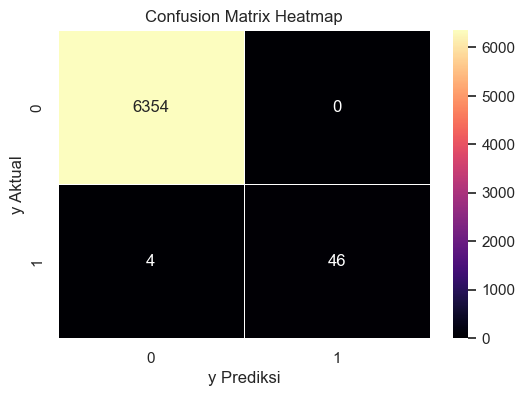

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', linewidths=0.5)

# Labels and title
plt.xlabel("y Prediksi")
plt.ylabel("y Aktual")
plt.title("Confusion Matrix Heatmap")

# Show plot
plt.show()

**Interpretation after Tuning**

- Berdasarkan confusion matrix di atas dari seluruh yang terprediksi pelanggan melakukan claim sebanyak 46 dan semua pelanggan yang melakukan claim telah berhasil terprediksi, dan ini di tampilkan dengan score precision sebesar 1.0 (100%). 

- Model telah berhasil memprediksi semua pelanggan yang meng-claim asuransi travel. 

- Berdasarkan recall, model memprediksi bahwa hanya 4 orang yang tidak claim asuransi travel, tetapi secara kenyataan pelanggan tersebut meng-claim asuransi. Dari ini model gagal memprediksi 4 pelanggan yang benar meng-claim asuransi travel, dari keseluruhan pelanggan sebanyak 50. 

- Tidak seperti prediksi sebelum hyperparameter tuning, proporsi dari dataset antara precision dan recall telah balance dengan proporsi 50/46 di bandingkan sebelum tuning memiliki proporsi 50/216. 

- F1 score menggagregasi dari efektifas precision dan recall di mana terlihat dengan f1 score bernilai kurang lebih 0.9583 (95.83%). 

**Pros**
- Secara ringkas model dapat memprediksi sangat baik dengan mengidentifikasi pelanggan yang tidak melakukan claim, dengan model ini perusahaan dapat mengalokasikan dana dengan baik kepada pelanggan yang membutuhkan dana. Dengan precision yang sempurna (100%), perusahaan akan jauh lebih bisa meminimalisir pengeluaran atau biaya operasional verifikasi/investigasi pelanggan yang berpotensi akan melakukan claim dan dari itu perusahaan dapat lebih bisa berfokus pada premi ataupun insurance plan yang dapat memaksimalkan pelanggan yang tidak meng-claim asuransi berdasarkan model ini. 

- Dampak dari model ini juga bisa terlihat kepada customer satisfaction di mana kelancaran proses claim akan berakibat puasnya pelanggan terhadap service dari perusahaan. Complaint yang sangat minimal dan kepuasan maksimal dari pelanggan akan berdampak kepada customer retention, dimana pelanggan akan merekomondendasikan perusahaan kepada kerabat dan keluarga. 

**Cons**
- Dengan score recall 92% adanya kemungkinan model dapat menimbulkan skenario pemalsuan claim, di mana pelanggan dapat mengeksploitasi kekurangan dari system yang akan mengakibatkan kerugian dalam jumlah skala yang sangat besar apabila tidak di tingkatkan lebih baik lagi persentase recall dari model tersebut.  

- Sebaliknya dalam confusion matrix menampilkan 4 claim yang terlewatkan oleh model ini dapat melewatkan pelanggan yang membutuhkan claim tersebut. Dan ini akan berdampak kepada proses claim yang sangatlah lama ataupun lebih buruk lagi tekanan keuangan yang bisa berujung tuntutan dari pelanggan. Dan ini bisa merusak reputasi perusahaan dalam waktu jangka panjang. 92% merupakan score yang sangat baik untuk tahap awal, tetapi harus terus di update setiap tahun.


### **Feature Importance**

**Permutation Feature Importance**

In [157]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(best_knn, X_test_transformed, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Get feature importance values
feature_importances = result.importances_mean

# Print feature importances
for feature, importance in zip(X_test.columns, feature_importances):
    print(f"{feature}: {importance}")


Distribution Channel: 0.008229231730168629
Product Name: 0.00035915053091815083
Duration: 0.00421611492816989
Destination: 0.000515302935665185
Net Sales: 0.030043722673329165
Commision (in value): 0.021627108057464095
Age: 0.018082448469706424
Region: 0.025921299188007462
Age Binning: 0.0
Commission (Y/N): 0.0014366021236726922
Sales Deduction: 0.004091193004372262


**Cara kerja permutation:** 

- Saat model berjalan, permutation mengacak/randomize model dengan mencabut tiap feature untuk mengidentifikasi apakah performa model ngedrop secara signifikan dari tiap model yang di remove/take out. Value berikut merepresentasikan penurunan tingkat performa dari feature tersebut apabila di remove.  

**Future Importance Order (Most-->Least)**

- Net Sales (0.0300) – Feature ini memiliki tingkat importance yang sangat tinggi 

- Region (0.0259) – Urutan kedua dari importance, benua di mana pelanggan melakukan wisata atau kunjungan merupakan aspek yang perlu di perhatikan.

- Commission (in value) (0.0216) – Komisi dari agency meraih urutan ketiga, tingkat insentif yang diberikan oleh perusahaan asuransi dapat mempengaruhi prediksi dari pelanggan yang melakukan claim.

- Age (0.0181) – Umur dari pelanggan dapat mempengaruhi model juga, walawpun tidak se-signifikan tingkat penjualan, benua, dan insentif berupa komisi.

- Distribution Channel (0.0082) – Channel atau outlet di mana pelanggan melakukan transaksi atau pertimbangan pembelian memiliki benchmark yang sedikit rendah.

- Duration & Sales Deduction (0.0041 & 0.0042) – Masi adanya tingkat kontribusi, akan tetapi sangatlah kecil. 

- Product Name & Destination (0.0003 & 0.0005) – Jenis policy dari asuransi dan destinasi travel negara yang spesifik memiliki kontribusi yang tidak harus di pertimbangkan dalam prediksi claim. 

- Age Binning (0.0) – Age group sangatlah tidak memiliki kontribusi sama sekali terhadap model prediksi. 

In [63]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.2 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------- 92.2/456.2 kB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 143.4/456.2 kB 1.2 MB/s eta 0:00:01
   --------------- ------------------------ 174.1/456.2 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 307.2/456.2 kB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/456.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 1.6 MB/s eta 0:00:00


**SHAP Plot**

![Feature](Featureimp.png)


  0%|          | 0/50 [00:00<?, ?it/s]

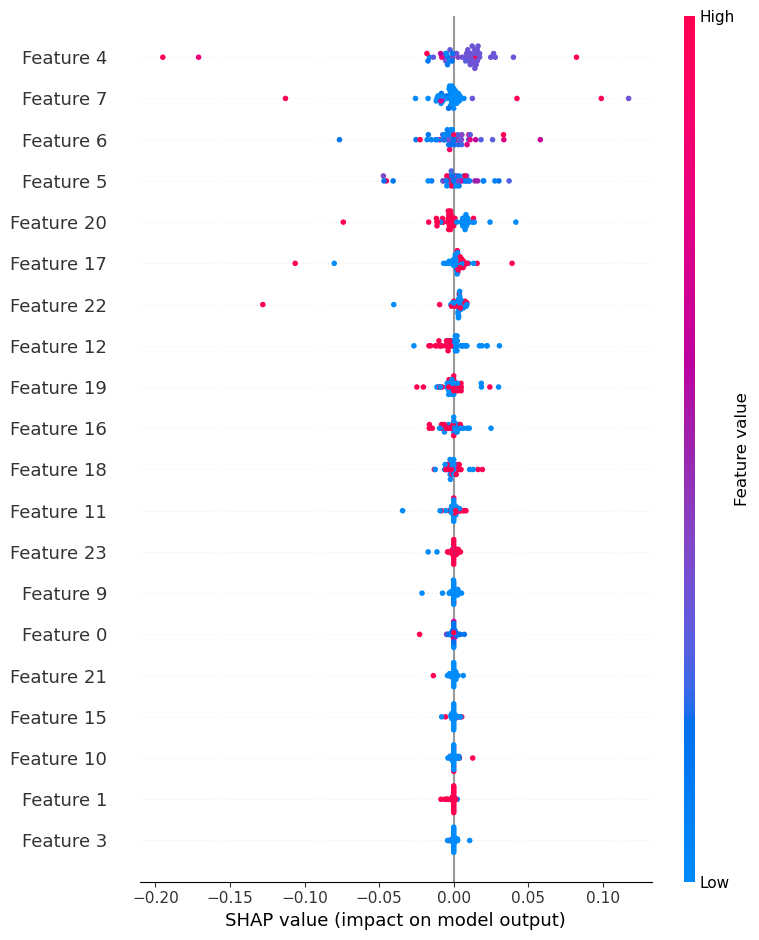

In [64]:
import shap

# Create an explainer
explainer = shap.KernelExplainer(best_knn.predict, X_test_transformed[:50])  # Sample 50 for efficiency

# Compute SHAP values
shap_values = explainer.shap_values(X_test_transformed[:50])

# Visualize importance
shap.summary_plot(shap_values, X_test_transformed[:50])


In [67]:
print(X_test.columns)  

Index(['Distribution Channel', 'Product Name', 'Duration', 'Destination',
       'Net Sales', 'Commision (in value)', 'Age', 'Region', 'Age Binning',
       'Commission (Y/N)', 'Sales Deduction'],
      dtype='object')


'scale__Age Binning',
 'Distribution Channel_Online',
 'Commission (Y/N)_Yes',
 'Sales Deduction_Yes',
 'Age',
 'Duration',
 'Net Sales',
 'Commision (in value)',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Destination_7',
 'Region_0',
 'Region_1',
 'Region_2'

# Conclusion

**`Broad Outline in Findings`**:

**Technical findings in Machine Learning**

DATAFRAME: 
- Feature engineering dari variable 'Region' merupakan keputusan yang sangat baik di mana dalam prediksi model, feature ini memiliki tingkat importance berurutan ke 2. Tetapi ada kekurangan di mana dataset ini memiliki tingkat frekuensi yang sangat tinggi di benua Asia dan ini merupakan ke bias an yang perlu di pertimbangkan. 

- Golongan umur yang di representasikan dengan feature 'Age Binning' yang di terapkan melalui feature engineering, tidak memiliki relevansi sama sekali dengan prediksi model di karenakan urutan paling bawah dari feature importance.  

- Null Vales yang terdapat dari pada feature 'Gender' merupakan gangguan dari model, dan tidak adanya pattern yang signifikan dari karakteristik Null Values. 

- Sulitnya untuk mengidentifikasi unique values dari feature 'Agency' karena wujud dari unique values tersebut berupa code dari agency tersebut. 

- Unique value 'Airlines' dari feature 'Agency Type' tidak memiliki faktor signifikan pada model. Di mana ini merepresentasikan pelanggan lebih sering mendapatkan plan asuransi melalui travel agency. Tetapi ini juga bisa di sebabkan oleh proporsi dari airlines yang sedikit di bandingkan travel agency. 

- Dengan membagikan model menjadi dua, di mana model pertama yang memiliki dataset hanya pada 'Agency Type' menghasilkan f1 score yang lebih tinggi di bandingkan model ke 2. Di mana model ke dua ini menggabungkan dataset dari 'Agency Type' dan 'Airlines'. Perlu di catat bahwa perbedaan f1 score tidaklah jauh, kurang lebih berbeda pada persentase 1%.  

- Feature engineer dari variable 'Sales Deduction' dan 'Commission (Y/N)' merupakan tambahan feature yang kurang signifikan. Berdasarkan feature importance 'Sales Deduction'/potongan harga memiliki nilai yang sedikit dalam memprediksi claim, akan tetapi di mana travel agency mendapatkan komisi atau tidak dari perusahaan asuransi tidak memiliki tingkat kepentingan sama sekali. 

- Pengedropan global outliers dari umur 19 tahun ke bawah dan umur 100 tahun keatas merupakan keputusan yang tetap dikarenakan nilai prediksi model bisa mencapai 95% keatas. 


**Advantages of Model**

- Berdasarkan tingkat precision, model ini akan sangat efektif dalam memprediksi pelanggan yang melakukan claim di mana ini dapat mengatur biaya operasional dengan baik dan mengantisipasi resiko financial dengan efisien. 

- Dapat menghasilkan nilai recall dengan baik dengan persentase 92%. Dengan ini model dapat mengidentifikasi pelanggan yang benar-benar meng-claim asuransi travel dengan akurat. Mengingat di mana target variable memiliki imbalance data yang miring. 

- Dengan ini model sangatlah berperan pada action plan perusahaan di mana model dapat memisahkan secara efektif antara pelanggan yang melakukan claim dan tidak. 


**Limitations of Models & Dataset**

- Nilai recall yang tidak se-optimal nilai precision dengan presentase 92%. Dan ini dapat berpotensial menjurus ke fraud claim. Di mana pelanggan yang cukup mengenal dengan system dari model dapat mengeksploitasi dengan mudah. 

- Proporsi yang tidak balance dari precision dan recall dengan ratio 50/46. Dimana ini dapat menimbulkan permasalahan generalisasi yang kurang optimal. Di mana dalam konteks claim bisa menjadi masalah. 

- Kembali kepada argumen imbalance ini bisa disebabkan oleh dataset yang terbatas. Keterbatasan ini berupa null values, outliers dengan frekuensi yang tinggi, kurangnya context dari data, dan dataset yang bersifat bias terhadap beberapa fitur. Contoh signifikan dari data bias ini terdapat dalam variable 'Age' dan 'Region'. Di mana pelanggan yang berumur 36 tahun mencakupi dataset lebih dari 50%, begitu juga dengan benua Asia mencakup lebih dari 50% dataset. 


**Business Implications (Feature Importance)**

Insight tindaklanjut:

- Berdasarkan feature importance, Net Sales, Region, Commission, dan Age memiliki nilai predictive yang sangat tinggi di bandingkan fitur lainnya. 

1. Net Sales: Perusahaan dapat merencanakan pricing policy dengan perusahaan asuransi, mengenai gimana mereka bisa mengoptimalisasi harga asuransi yang bisa menguntungkan profit dari kedua belah pihak. Strategi ini bisa berupa potongan harga, paket bundle, dan segmentasi pelanggan premium yang berkemungkinan untuk membeli policy dengan mengatur rate claim dari segmen tersebut. 

2. Region: Memiliki rencana dalam meng-segmentasi benua yang memiliki tingkat claim tinggi, dengan ini perusahaan dapat mengoptimalisasi profit dan meminimalisir pengeluaran dari pelanggan yang melakukan claim. Meng-investigasi benua yang memiliki tingkat claim yang abnormal dan melakukan exploratory data terhadap benua tersebut, di mana tingkat claim yang tinggi berkemungkinan memiliki tingkat fraud yang perlu di selidiki. Dan apabila tidak adanya deteksi fraud, perusahaan dapat melakukan perubahan harga premium pada benua tersebut.   

3. Commisssion: Untuk tahap awal bisa bernegosiasi dengan perusahaan asuransi untuk memiliki persentase komisis yang stabil di mana perusahaan memiliki pendapatan yang konsisten untuk mengatasi fluktuatif dari harga. Apabila banyak insurance policy yang terjual dengan tingkat claim tinggi, pertimbangkan untuk menyeimbangkan komisi yang di dapatkan dengan seporsi dari pengeluaran untuk meng-cover claim dengan cara meningkatkan insentif buat pelanggan dari segmen yang memiliki tingkat claim yang rendah.   

4. Age: Meng-adjust policy asuransi pada grup atau umur pelanggan yang memiliki tingkat claim tinggi. Melakukan perubahan harga berdasarkan tingkatan umur pelanggan di mana semakin tua umur dari pelanggan, semakin besar memasang harga policy untuk mengantisipasi tingkat claim yang tinggi dari cluster yang berumur tua. 

5. Age Binning, Product Name, Destination: Kurangi fokus strategi marketing dan pricing pada ketiga feature ini di karenakan memiliki feature importance yang sangat rendah. Mengcluster jangkauan umur yang berbeda dengan feature 'Age Binning', untuk melihat apakah jarak umur yang berbeda akan berperan penting pada strategi marketing perusahaan. Mendefinisikan beberapa tipe policy yang memiliki tingkat claim rendah dengan tingkat claim tinggi. Tidak perlu berfokus kepada negara yang di kunjungi pelanggan kecuali adanya anomali dengan tingkat claim yang tinggi. 